<a href="https://colab.research.google.com/github/daunelaugust/Basketball-Data-Analysis/blob/main/Final_Project_545.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team: Juan Quezada, Dustin Pavlick, Daunel Augustin

#Part 0: Libraries set up and Background

Hi, the main goal of our project is to perform data analysis on Basketball Stats. We will use data from the National Basketball Association (NBA) and the National Collegiate Athletic Association (NCAA). This will allow us to obtain individual player statistics and perform predictions based on player performance through a multitude of seasons.

Our dataset contains data from the 1947 NBA season to the present day. We also have data on collegiate players through the 2009 to 2021 season.


Below is a photo of a few of the current stars in the modern nba!

nba risers.avif

Additionally here is a photo of current NBA stars Devin Booker, Anthony Davis, Jayson Tatum, and Kyrie Irving as former players at Duke in Division I NCAA. Division I Basketball is the most competitive division of collegiate-level basketball.

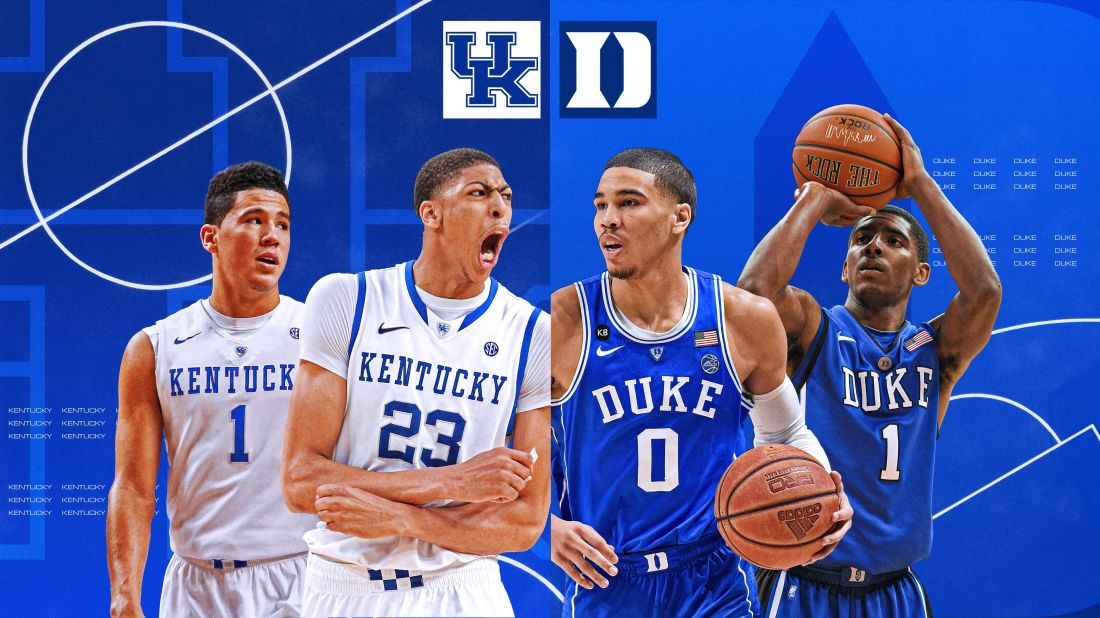

###Import and install the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
# import pandasql as ps #SQL on Pandas Dataframe
import math
import re

##NBA/ABA/BAA Timeline and Background
Below is a timeline of significant events that occurred in NBA/ABA history up until 2010. The American Basketball Association (ABA) and NBA merged in 1976 which combined both leagues and further improved its overall popularity and success. The Basketball Association of America (BAA) was also merged earlier on with the NBA. For the purposes of this assignment we will refer to all three combined leagues as the NBA.

You can also see below key rule changes that may affect NBA stats over time such as the 24-second shot clock, three-pointers, and hand-checking.

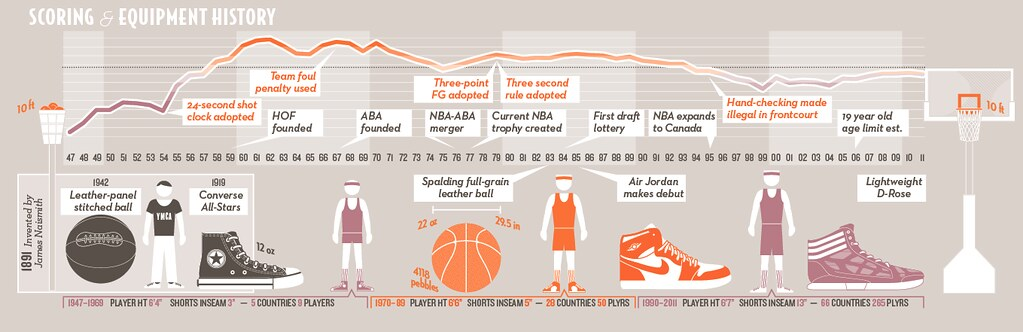

##Why are we so interested in Basketball stats?

Everyone in our group members are NBA fans, therefore our project is fueled by a genuine interest and enthusiasm for the sport. Analyzing data throughout NBA and partially NCAA history allows for a historical comparison of players across different eras, offering insights into how the game and its athletes have evolved.

Ultimately we would like to use the main statistical categories such as points, rebounds, assists, blocks, and steals to determine when a player has reached their prime across multiple seasons. “**Prime**” is a universal term in sports denoting a player is at the peak of their career.





## Mounting Kaggle Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: Data Cleaning and Exploring the NBA dataset
As stated earlier we have a dataset with NBA data from 1947-present day. Let's read our first file and begin cleaning!



##Player Per Game Data and Advanced Player Data

Read two CSV files, one named **Player Per Game** which contains NBA player averages across every season since 1947. The other named "**Advanced**" file contains Advanced Player stats for each player since 1947.

We are storing these in the dataframe variables <code>ppg_df</code> and <code>advanced_df</code> respectively

In [ ]:
advanced_path = '/content/drive/Shareddrives/545 Project/archive/Advanced.csv'
player_per_game_path = '/content/drive/Shareddrives/545 Project/archive/Player Per Game.csv'

advanced_df = pd.read_csv(advanced_path)
ppg_df = pd.read_csv(player_per_game_path)

####Cleaning the NBA Dataset

Great now let's perform <code> head()</code> and <code> dtypes</code>  to get a good to get a overview of our dataframe. Which will give us a good grasp of the data that we are working with. Run the following cells below!

In [ ]:
ppg_df.head(20)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,1.000,0.0,0.5,0.5,1.0,0.0,0.0,0.0,1.5,3.5
1,31137,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,NaN,0.3,1.0,1.3,0.5,0.3,0.0,0.5,0.3,4.3
2,31138,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.250,1.8,3.0,4.8,3.0,1.5,1.3,1.3,1.5,13.8
3,31139,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31140,2024,4805,Aaron Nesmith,NaN,SF,24.0,4,NBA,IND,...,0.833,1.7,4.3,6.0,1.3,0.0,1.0,0.3,3.3,12.7
5,31141,2024,4900,Aaron Wiggins,NaN,SG,25.0,3,NBA,OKC,...,0.500,0.3,0.7,1.0,0.3,0.0,0.3,0.7,0.7,2.3
6,31142,2024,3734,Al Horford,NaN,C,37.0,17,NBA,BOS,...,NaN,3.3,4.0,7.3,1.7,0.7,0.3,2.0,1.3,5.3
7,31143,2024,3982,Alec Burks,NaN,SG,32.0,13,NBA,DET,...,0.800,0.3,3.0,3.3,2.3,0.3,0.8,0.0,1.5,15.0
8,31144,2024,4806,Aleksej Pokusevski,NaN,PF,22.0,4,NBA,OKC,...,0.500,0.0,1.0,1.0,0.0,0.0,0.3,1.0,1.0,0.3
9,31145,2024,4465,Alex Caruso,NaN,PG,29.0,7,NBA,CHI,...,0.500,2.3,3.8,6.0,3.0,2.0,0.8,1.0,2.5,7.3


In [ ]:
ppg_df.dtypes

seas_id            int64
season             int64
player_id          int64
player            object
birth_year       float64
pos               object
age              float64
experience         int64
lg                object
tm                object
g                  int64
gs               float64
mp_per_game      float64
fg_per_game      float64
fga_per_game     float64
fg_percent       float64
x3p_per_game     float64
x3pa_per_game    float64
x3p_percent      float64
x2p_per_game     float64
x2pa_per_game    float64
x2p_percent      float64
e_fg_percent     float64
ft_per_game      float64
fta_per_game     float64
ft_percent       float64
orb_per_game     float64
drb_per_game     float64
trb_per_game     float64
ast_per_game     float64
stl_per_game     float64
blk_per_game     float64
tov_per_game     float64
pf_per_game      float64
pts_per_game     float64
dtype: object

In [ ]:
ppg_df.describe()

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp_per_game,fg_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
count,31550.000000,31550.000000,31550.000000,2869.000000,31528.000000,31550.000000,31550.000000,22913.000000,30467.000000,31550.000000,...,30181.000000,26893.000000,26893.000000,30656.000000,31550.000000,25924.000000,25925.000000,25915.000000,31550.000000,31550.000000
mean,15775.500000,1994.754960,2631.094358,1944.120600,26.487249,4.965357,48.389826,22.274866,20.213818,3.175848,...,0.721335,1.045201,2.535429,3.740984,1.871325,0.664114,0.404852,1.264110,2.001265,8.348792
std,9107.844833,20.323262,1292.912189,15.130145,3.840357,3.720458,26.968684,27.893646,10.271367,2.309201,...,0.144514,0.895616,1.870269,2.836417,1.777976,0.483594,0.500158,0.854048,0.923039,6.112988
min,1.000000,1947.000000,1.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7888.250000,1979.000000,1615.000000,1938.000000,24.000000,2.000000,24.000000,0.000000,11.700000,1.400000,...,0.658000,0.400000,1.200000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000
50%,15775.500000,1998.000000,2720.500000,1946.000000,26.000000,4.000000,54.000000,7.000000,19.400000,2.600000,...,0.745000,0.800000,2.100000,3.000000,1.300000,0.600000,0.200000,1.100000,2.000000,6.900000
75%,23662.750000,2012.000000,3699.000000,1951.000000,29.000000,7.000000,74.000000,41.000000,28.700000,4.500000,...,0.811000,1.500000,3.400000,5.000000,2.500000,0.900000,0.500000,1.700000,2.700000,11.800000
max,31550.000000,2024.000000,5159.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,20.000000,...,1.000000,7.200000,13.700000,27.200000,14.500000,4.100000,6.000000,6.000000,6.000000,50.400000


Doing that allowed us to see some cool things like the average stats for pts_per_game (Points), ast_per_game (Assists), and even see the average minutes per game (mp_per_game)**bold text**

In [ ]:
advanced_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.0,12.8,0.0,0.0,0.0,0.064,-3.2,-3.1,-6.3,0.0
1,31137,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,16.7,14.8,0.1,0.0,0.1,0.135,5.5,-2.0,3.5,0.0
2,31138,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,10.1,17.9,0.3,0.2,0.5,0.189,0.8,1.2,2.0,0.1
3,31139,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.0,26.5,-0.1,0.0,-0.1,-0.702,-21.4,-12.7,-34.1,0.0
4,31140,2024,4805,Aaron Nesmith,NaN,SF,24.0,4,NBA,IND,...,3.5,14.6,0.3,0.1,0.3,0.188,1.3,-1.8,-0.5,0.0


In [ ]:
advanced_df.dtypes

seas_id          int64
season           int64
player_id        int64
player          object
birth_year     float64
pos             object
age            float64
experience       int64
lg              object
tm              object
g                int64
mp             float64
per            float64
ts_percent     float64
x3p_ar         float64
f_tr           float64
orb_percent    float64
drb_percent    float64
trb_percent    float64
ast_percent    float64
stl_percent    float64
blk_percent    float64
tov_percent    float64
usg_percent    float64
ows            float64
dws            float64
ws             float64
ws_48          float64
obpm           float64
dbpm           float64
bpm            float64
vorp           float64
dtype: object

In [ ]:
advanced_df.describe()

,seas_id,season,player_id,birth_year,age,experience,g,mp,per,ts_percent,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
count,31550.000000,31550.000000,31550.000000,2869.000000,31528.000000,31550.000000,31550.000000,30467.000000,30450.000000,31398.000000,...,25797.000000,25910.000000,31539.000000,31539.000000,31539.000000,30450.000000,25903.000000,25903.000000,25903.000000,25903.000000
mean,15775.500000,1994.754960,2631.094358,1944.120600,26.487249,4.965357,48.389826,1154.532970,12.486722,0.495743,...,14.719308,18.843709,1.188963,1.164048,2.354162,0.065708,-1.683307,-0.238806,-1.922364,0.538521
std,9107.844833,20.323262,1292.912189,15.130145,3.840357,3.720458,26.968684,932.178422,6.376320,0.104179,...,7.107738,5.548914,2.067455,1.235066,2.969999,0.106651,7.387890,1.866470,7.977044,1.253094
min,1.000000,1947.000000,1.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,-90.600000,0.000000,...,0.000000,0.000000,-5.100000,-1.000000,-2.800000,-2.519000,-1000.000000,-31.100000,-1000.000000,-2.600000
25%,7888.250000,1979.000000,1615.000000,1938.000000,24.000000,2.000000,24.000000,291.500000,9.700000,0.457000,...,11.000000,15.300000,-0.100000,0.200000,0.200000,0.031000,-3.300000,-1.000000,-3.700000,-0.100000
50%,15775.500000,1998.000000,2720.500000,1946.000000,26.000000,4.000000,54.000000,978.000000,12.700000,0.509000,...,13.900000,18.500000,0.400000,0.800000,1.300000,0.076000,-1.400000,-0.200000,-1.500000,0.100000
75%,23662.750000,2012.000000,3699.000000,1951.000000,29.000000,7.000000,74.000000,1889.000000,15.700000,0.550000,...,17.300000,22.100000,1.800000,1.700000,3.600000,0.116000,0.300000,0.600000,0.400000,0.800000
max,31550.000000,2024.000000,5159.000000,2002.000000,46.000000,22.000000,90.000000,3882.000000,133.800000,1.500000,...,100.000000,100.000000,18.300000,16.000000,25.400000,2.712000,199.400000,60.700000,242.200000,12.500000


###Merge Player Per Game and Advanced Data

Immediately we see that both datasets have overlapping columns in <code>ppg_df</code> and <code>advanced_df</code>. We want to get data in both of these tables in just one for our exploratory analysis so let's join <code>ppg_df</code> and <code>advanced_df</code> then drop all duplicated columns between both dataframes

We'll store the result in <code>merged_ppg_advanced</code>

In [ ]:
#checking the length of each df
print("Length of ppg_df: ",len(ppg_df))
print("Length of advanced_df: ",len(advanced_df))

# performing the merge and dropping duplicate columns, merging by the id of the player and corresponding season
merged_ppg_advanced = pd.merge(ppg_df, advanced_df, on=['player_id', 'seas_id'], how='inner')
merged_ppg_advanced = merged_ppg_advanced.drop(columns=['player_y', 'birth_year_y', 'pos_y',
       'age_y', 'experience_y', 'lg_y', 'tm_y', 'g_y', 'season_y'])

#checking length of merged df
print("Length of merged_ppg_advanced: ", len(merged_ppg_advanced))

Length of ppg_df:  31550
Length of advanced_df:  31550
Length of merged_ppg_advanced:  31550


In [ ]:
merged_ppg_advanced.columns

Index(['seas_id', 'season_x', 'player_id', 'player_x', 'birth_year_x', 'pos_x',
       'age_x', 'experience_x', 'lg_x', 'tm_x', 'g_x', 'gs', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game',
       'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game',
       'x2p_percent', 'e_fg_percent', 'ft_per_game', 'fta_per_game',
       'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game',
       'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game',
       'pf_per_game', 'pts_per_game', 'mp', 'per', 'ts_percent', 'x3p_ar',
       'f_tr', 'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp'],
      dtype='object')

###Removing Traded Seasons

Another potential issue we noticed is that if a player was traded within a season they appear three times for that season year. This is because there stats for each team appear as a row and the combined stats for the season appear under a row where the column named **tm_x ='TOT'**. Our goal is to remove the unecesssary rows for those players and then keep the rows that have the combined stats for that year.

You can see below famous NBA superstar Kevin Durant appears3 times for the year he was traded in 2023

In [ ]:
#Here's an example of what we mean
dup_players = merged_ppg_advanced[merged_ppg_advanced['player_x'] == 'Kevin Durant']

dup_players.head()

,seas_id,season_x,player_id,player_x,birth_year_x,pos_x,age_x,experience_x,lg_x,tm_x,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
246,31382,2024,3770,Kevin Durant,NaN,PF,35.0,16,NBA,PHO,...,15.5,32.5,0.2,0.2,0.4,0.141,2.5,0.3,2.8,0.2
797,30839,2023,3770,Kevin Durant,NaN,PF-SF,34.0,15,NBA,TOT,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
798,30840,2023,3770,Kevin Durant,NaN,PF,34.0,15,NBA,BRK,...,13.7,31.5,3.9,1.7,5.7,0.194,5.8,1.2,7.0,3.2
799,30841,2023,3770,Kevin Durant,NaN,SF,34.0,15,NBA,PHO,...,11.8,26.8,0.8,0.3,1.1,0.196,7.1,0.8,7.9,0.7
1558,30110,2022,3770,Kevin Durant,NaN,PF,33.0,14,NBA,BRK,...,12.9,31.2,6.4,2.0,8.4,0.198,6.4,0.7,7.2,4.8


Luckily we know the data was scrapped from basketball reference that includes the combined stats of a player when they are traded. As stated earlier this is under the team name 'TOT'

Below we filter for Kevin Durant's seasons where the Team name equals TOT and add them to a list. Then we filter the dataframe by keeping seasons where the Team name is TOT or the seasons that Kevin Durant has played in that is not in traded seasons.

In [ ]:
traded_seasons = dup_players[dup_players['tm_x'] == 'TOT']['season_x'].tolist()

# Filter the DataFrame to keep only rows where KD (Kevin Durant's nickname)  was traded or played for a single team
final_df = dup_players[
    (dup_players['tm_x'] == 'TOT') | (~dup_players['season_x'].isin(traded_seasons))
]


final_df.head()

,seas_id,season_x,player_id,player_x,birth_year_x,pos_x,age_x,experience_x,lg_x,tm_x,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
246,31382,2024,3770,Kevin Durant,NaN,PF,35.0,16,NBA,PHO,...,15.5,32.5,0.2,0.2,0.4,0.141,2.5,0.3,2.8,0.2
797,30839,2023,3770,Kevin Durant,NaN,PF-SF,34.0,15,NBA,TOT,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
1558,30110,2022,3770,Kevin Durant,NaN,PF,33.0,14,NBA,BRK,...,12.9,31.2,6.4,2.0,8.4,0.198,6.4,0.7,7.2,4.8
2304,29339,2021,3770,Kevin Durant,NaN,PF,32.0,13,NBA,BRK,...,14.5,31.2,3.7,1.2,5.0,0.206,6.4,0.8,7.2,2.7
3656,27979,2019,3770,Kevin Durant,NaN,SF,30.0,12,NBA,GSW,...,12.3,29.0,8.6,2.9,11.5,0.204,5.4,0.1,5.5,5.1


Voila a success! Now lets do it for the entire dataframe. First lets turn our code into a function named  <code>filter_traded_seasons</code>.


In [ ]:
#Defining the filter as a function
def filter_traded_seasons(player_df):
    traded_seasons = player_df[player_df['tm_x'] == 'TOT']['season_x'].tolist()
    return player_df[
        (player_df['tm_x'] == 'TOT') | (~player_df['season_x'].isin(traded_seasons))
    ]

Next we'll group by **player_id** and `apply ` the function to each player

In [ ]:
final_df = merged_ppg_advanced.groupby('player_id').apply(filter_traded_seasons)

See the final result and store in` player_stats_df`.

Note: You'll also notice certain advanced stats were not recorded during the earlier years of the NBA

In [ ]:
player_stats_df = final_df
player_stats_df = player_stats_df.sort_values(by='season_x', ascending=False)
player_stats_df.reset_index(drop=True, inplace=True)
player_stats_df

,seas_id,season_x,player_id,player_x,birth_year_x,pos_x,age_x,experience_x,lg_x,tm_x,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31540,2024,5159,Victor Wembanyama,NaN,PF,20.0,1,NBA,SAS,...,24.4,30.1,-0.2,0.1,-0.1,-0.044,-4.2,-0.5,-4.8,-0.1
1,31217,2024,4923,Dalano Banton,NaN,PG,24.0,3,NBA,BOS,...,25.0,16.8,0.0,0.0,0.0,-0.063,-6.6,-6.9,-13.5,0.0
2,31418,2024,4424,Malcolm Brogdon,NaN,PG,31.0,8,NBA,POR,...,7.7,30.1,0.2,0.0,0.2,0.107,5.1,-2.2,2.8,0.1
3,31485,2024,4197,Robert Covington,NaN,PF,33.0,11,NBA,LAC,...,0.0,6.1,0.1,0.2,0.2,0.172,-1.8,3.6,1.8,0.1
4,31229,2024,4926,Davion Mitchell,NaN,PG,25.0,3,NBA,SAC,...,25.0,12.1,-0.1,0.0,-0.1,-0.105,-11.4,-0.9,-12.2,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25692,101,1947,83,Harold Kottman,NaN,C,24.0,1,BAA,BOS,...,NaN,NaN,1.2,0.3,1.6,NaN,NaN,NaN,NaN,NaN
25693,100,1947,82,Harold Johnson,NaN,C,27.0,1,BAA,DTF,...,NaN,NaN,0.1,0.4,0.4,NaN,NaN,NaN,NaN,NaN
25694,99,1947,81,Harold Brown,NaN,G,23.0,1,BAA,DTF,...,NaN,NaN,0.2,2.6,2.9,NaN,NaN,NaN,NaN,NaN
25695,96,1947,80,Hank Rosenstein,NaN,F,26.0,1,BAA,TOT,...,NaN,NaN,3.9,0.7,4.6,NaN,NaN,NaN,NaN,NaN


**Removing "_x" from columns following the merge with <code>ppg_df</code> and <code>advanced_df</code>**

In [ ]:
player_stats_df = player_stats_df.rename(columns=lambda x: x.rstrip('_x') if x.endswith('_x') else x)
player_stats_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'mp', 'per', 'ts_percent', 'x3p_ar', 'f_tr',
       'orb_percent', 'drb_percent', 'trb_percent', 'ast_percent',
       'stl_percent', 'blk_percent', 'tov_percent', 'usg_percent', 'ows',
       'dws', 'ws', 'ws_48', 'obpm', 'dbpm', 'bpm', 'vorp'],
      dtype='object')

**Removing the birth year column and replacing all 'NA' with 0**

In [ ]:
# Drop birth_year as we will not use this column
player_stats_df = player_stats_df.drop(columns=['birth_year'])

# replacing 'NA' with 0 in the entire DataFrame
player_stats_df = player_stats_df.replace('NA', 0)

In [ ]:
player_stats_df

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31540,2024,5159,Victor Wembanyama,PF,20.0,1,NBA,SAS,4,...,24.4,30.1,-0.2,0.1,-0.1,-0.044,-4.2,-0.5,-4.8,-0.1
1,31217,2024,4923,Dalano Banton,PG,24.0,3,NBA,BOS,1,...,25.0,16.8,0.0,0.0,0.0,-0.063,-6.6,-6.9,-13.5,0.0
2,31418,2024,4424,Malcolm Brogdon,PG,31.0,8,NBA,POR,4,...,7.7,30.1,0.2,0.0,0.2,0.107,5.1,-2.2,2.8,0.1
3,31485,2024,4197,Robert Covington,PF,33.0,11,NBA,LAC,3,...,0.0,6.1,0.1,0.2,0.2,0.172,-1.8,3.6,1.8,0.1
4,31229,2024,4926,Davion Mitchell,PG,25.0,3,NBA,SAC,3,...,25.0,12.1,-0.1,0.0,-0.1,-0.105,-11.4,-0.9,-12.2,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25692,101,1947,83,Harold Kottman,C,24.0,1,BAA,BOS,53,...,NaN,NaN,1.2,0.3,1.6,NaN,NaN,NaN,NaN,NaN
25693,100,1947,82,Harold Johnson,C,27.0,1,BAA,DTF,27,...,NaN,NaN,0.1,0.4,0.4,NaN,NaN,NaN,NaN,NaN
25694,99,1947,81,Harold Brown,G,23.0,1,BAA,DTF,54,...,NaN,NaN,0.2,2.6,2.9,NaN,NaN,NaN,NaN,NaN
25695,96,1947,80,Hank Rosenstein,F,26.0,1,BAA,TOT,60,...,NaN,NaN,3.9,0.7,4.6,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(player_stats_df)

25697

###Sanity Check with Basketball reference

Get the 20 best scorers and compare them to the link here to make sure we are manipulating our data correctly so far. Check [here](https://www.basketball-reference.com/leaders/pts_per_g_season.html).



In [ ]:
top_20_players = player_stats_df.nlargest(20, 'pts_per_game')
top_20_players = top_20_players[['player', 'season' ,'pts_per_game']].reset_index(drop=True)
top_20_players

,player,season,pts_per_game
0,Wilt Chamberlain,1962,50.4
1,Wilt Chamberlain,1963,44.8
2,Luka Dončić,2024,39.0
3,Wilt Chamberlain,1961,38.4
4,Elgin Baylor,1962,38.3
5,Wilt Chamberlain,1960,37.6
6,Michael Jordan,1987,37.1
7,Wilt Chamberlain,1964,36.9
8,James Harden,2019,36.1
9,Rick Barry,1967,35.6


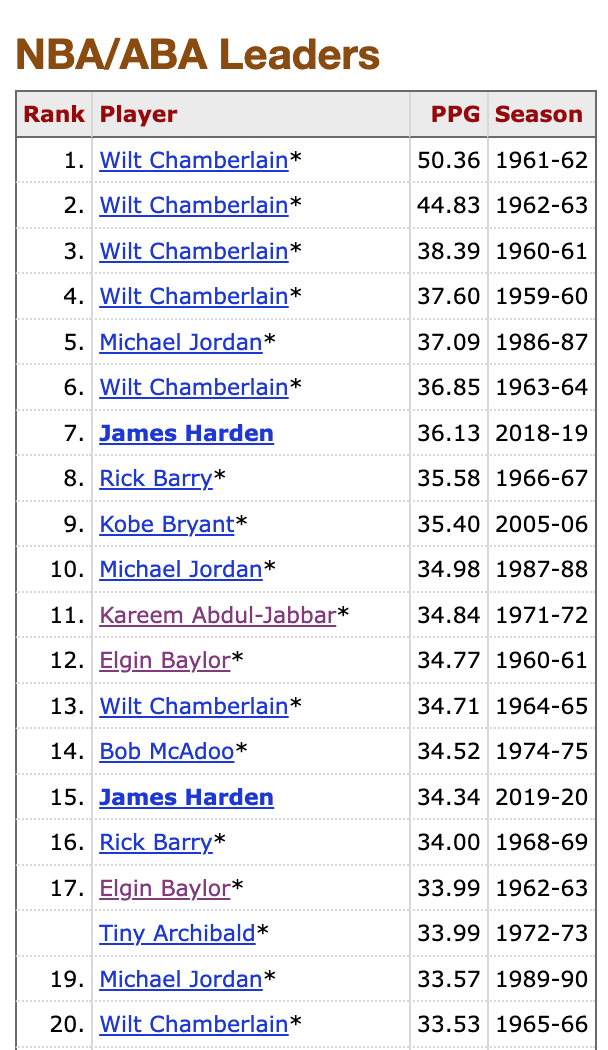

We notice there are some differences immeadiately which are directly due to basketball reference filtering for games played and updating seasons(2024 season in progress)

If we apply a similar filter below we obtain a nearly identical table with subtle differences due to other filters they may have applied

In [ ]:
#applying a similar filter
top_players_filter = player_stats_df[(player_stats_df['g'] > 48) & (player_stats_df['season'] != 2024) & (player_stats_df['lg'] != 'BAA')]

new_top_20_players = top_players_filter.nlargest(20, 'pts_per_game')
new_top_20_players = new_top_20_players[['player', 'season' ,'pts_per_game']].reset_index(drop=True)
new_top_20_players

,player,season,pts_per_game
0,Wilt Chamberlain,1962,50.4
1,Wilt Chamberlain,1963,44.8
2,Wilt Chamberlain,1961,38.4
3,Wilt Chamberlain,1960,37.6
4,Michael Jordan,1987,37.1
5,Wilt Chamberlain,1964,36.9
6,James Harden,2019,36.1
7,Rick Barry,1967,35.6
8,Kobe Bryant,2006,35.4
9,Michael Jordan,1988,35.0


Lets produce a similar table for NBA player efficiency and win shares

In [ ]:
#Most effiecent player seasons
top_effiecent_players = top_players_filter.nlargest(20, 'per')

#Players who stats contribute the most to team success
top_ws_players = top_players_filter.nlargest(20, 'ws')


top_effiecent_df = top_effiecent_players[['player', 'season' ,'per']].reset_index(drop=True)
top_ws_df = top_effiecent_players[['player', 'season' ,'ws']].reset_index(drop=True)


top_effiecent_df

,player,season,per
0,Nikola Jokić,2022,32.8
1,Giannis Antetokounmpo,2022,32.1
2,Wilt Chamberlain,1962,32.1
3,Giannis Antetokounmpo,2020,31.9
4,Wilt Chamberlain,1963,31.8
5,LeBron James,2009,31.7
6,Michael Jordan,1988,31.7
7,LeBron James,2013,31.6
8,Michael Jordan,1991,31.6
9,Wilt Chamberlain,1964,31.6


In [ ]:
top_ws_df

,player,season,ws
0,Nikola Jokić,2022,15.2
1,Giannis Antetokounmpo,2022,12.9
2,Wilt Chamberlain,1962,23.1
3,Giannis Antetokounmpo,2020,11.1
4,Wilt Chamberlain,1963,20.9
5,LeBron James,2009,20.3
6,Michael Jordan,1988,21.2
7,LeBron James,2013,19.3
8,Michael Jordan,1991,20.3
9,Wilt Chamberlain,1964,25.0


As we can see it appears the most effiecent players contribute the most to their team success as there is good overlap between both tables.

In [ ]:
matching_players = []
matching_players.extend(top_effiecent_df['player'][top_effiecent_df['player'].isin(top_ws_df ['player'])].tolist())
print("The number of overlapping players is ", len(matching_players))
print(" ")
matching_players

The number of overlapping players is  20
 


['Nikola Jokić',
 'Giannis Antetokounmpo',
 'Wilt Chamberlain',
 'Giannis Antetokounmpo',
 'Wilt Chamberlain',
 'LeBron James',
 'Michael Jordan',
 'LeBron James',
 'Michael Jordan',
 'Wilt Chamberlain',
 'Nikola Jokić',
 'Stephen Curry',
 'Joel Embiid',
 'Nikola Jokić',
 'Joel Embiid',
 'Michael Jordan',
 'LeBron James',
 'Michael Jordan',
 'Giannis Antetokounmpo',
 'Anthony Davis']

Let's move along to forming our dataset to build valuable models

#Part 2: Combine NBA player data with National Collegiate Athletic Association  (NCAA)


The dataset, although rich in quality data and encompassing a wide range of columns, reveals a shortfall in volume once cleaned. Recognizing the NCAA as a pivotal stage for many future NBA players, we identified an opportunity to enrich our analysis. By integrating a dataset featuring statistical information on NCAA players with our NBA dataset, we aim to create a more comprehensive and insightful resource.

Our plan will be to concatenate the datasets by combining columns that match across both tables.

**Note:** Our NCAA dataset only contains data from 2009-2021 which is a limtation discussed further in our conclusion

In [ ]:
NBA_players_df = pd.read_csv('/content/drive/Shareddrives/545 Project/archive/Player Totals.csv').copy()
NCAA_players_df = pd.read_csv('/content/drive/Shareddrives/545 Project/CollegeBasketballPlayers2009-2021 2.csv').copy()

<ipython-input-33-49b69165f7df>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  NCAA_players_df = pd.read_csv('/content/drive/Shareddrives/545 Project/CollegeBasketballPlayers2009-2021 2.csv').copy()


In [ ]:
NBA_players_columns = list(NBA_players_df.columns)

This ensures that our player_id in the NCAA do not overlap with the NBA, as the highest player_id in the NBA is in the 5000s

In [ ]:
NCAA_players_df['player_id'] = NCAA_players_df['pid'] +10000

In [ ]:
NCAA_players_df.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65', 'player_id'],
      dtype='object')

In [ ]:
final_players_df = pd.DataFrame(columns=NBA_players_columns)
final_players_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

## Data Cleaning for our Combined Basketball Dataset

Set up dictionary for age of players in NCAA and years of experience

In [ ]:
age_dict = {'Fr': 19, 'So': 20, 'Jr': 21, 'Sr': 22}
experience_dict = {'Fr': 1, 'So': 2, 'Jr': 3, 'Sr': 4}

### Concatenating NBA and NCAA stats

Matching the columns across both tables by combining identical stat categories

In [ ]:
#Wrangle the NCAA players data to match the NBA players data
final_players_df['season'] = NCAA_players_df['year']
final_players_df['player_id'] = NCAA_players_df['player_id']
final_players_df['player'] = NCAA_players_df['player_name']
final_players_df['age'] = NCAA_players_df['yr'].apply(lambda x: age_dict.get(x))
final_players_df['experience'] = NCAA_players_df['yr'].apply(lambda x: experience_dict.get(x))
final_players_df['lg'] = 'NCAA'
final_players_df['tm'] = NCAA_players_df['team']
final_players_df['g'] = NCAA_players_df['GP']
final_players_df['mp'] = np.rint(NCAA_players_df['Min_per']*NCAA_players_df['GP'])


#Field goal stats as a combination of three pointers and two pointers
final_players_df['fg'] = NCAA_players_df['TPM'] + NCAA_players_df['twoPM']
final_players_df['fga'] = NCAA_players_df['TPA'] + NCAA_players_df['twoPA']
final_players_df['fg_percent'] = final_players_df['fg'] / final_players_df['fga']

#Three pointer stats
final_players_df['x3p'] = NCAA_players_df['TPM']
final_players_df['x3pa'] = NCAA_players_df['TPA']
final_players_df['x3p_percent'] = NCAA_players_df['TP_per']

#Two pointer stats
final_players_df['x2p'] = NCAA_players_df['twoPM']
final_players_df['x2pa'] = NCAA_players_df['twoPA']
final_players_df['x2p_percent'] = NCAA_players_df['twoP_per']
final_players_df['e_fg_percent'] = NCAA_players_df['eFG']

#Free throw stats
final_players_df['ft'] = NCAA_players_df['FTM']
final_players_df['fta'] = NCAA_players_df['FTA']
final_players_df['ft_percent'] = NCAA_players_df['FT_per']

#Rebound stats
final_players_df['orb'] = np.rint(NCAA_players_df['oreb']*NCAA_players_df['GP'])
final_players_df['drb'] = np.rint(NCAA_players_df['dreb']*NCAA_players_df['GP'])
final_players_df['trb'] = final_players_df['orb'] + final_players_df['drb']

#Assists stats
final_players_df['ast'] = np.rint(NCAA_players_df['ast']*NCAA_players_df['GP'])

#Steals stats
final_players_df['stl'] = np.rint(NCAA_players_df['stl']*NCAA_players_df['GP'])

#Blocks stats
final_players_df['blk'] = np.rint(NCAA_players_df['blk']*NCAA_players_df['GP'])

#Turnovers and personal foul stats
final_players_df['tov'] = np.rint(1/NCAA_players_df['ast/tov']*final_players_df['ast'])
final_players_df['pf'] = np.rint(NCAA_players_df['pfr']*NCAA_players_df['GP'])

#Total points
final_players_df['pts'] = np.rint(NCAA_players_df['pts']*NCAA_players_df['GP'])

Concatenating both dataframes

In [ ]:
final_players_df = pd.concat([final_players_df, NBA_players_df], axis=0)

In [ ]:
final_players_df = final_players_df.sort_values(['player', 'season'], ascending=[True, True])
final_players_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
41316,NaN,2017,57747,A'Torey Everett,NaN,NaN,20.0,2.0,NCAA,Tennessee St.,...,0.783,3.0,17.0,20.0,16.0,2.0,1.0,18.0,126.0,56.0
27098,NaN,2014,42648,A'Torri Shine,NaN,NaN,21.0,3.0,NCAA,Grambling St.,...,0.786,36.0,75.0,111.0,29.0,12.0,7.0,65.0,70.0,359.0
30166,NaN,2015,42648,A'Torri Shine,NaN,NaN,22.0,4.0,NCAA,Grambling St.,...,0.733,25.0,71.0,96.0,22.0,24.0,5.0,53.0,70.0,344.0
22005,NaN,2013,36838,A'Uston Calhoun,NaN,NaN,22.0,4.0,NCAA,Bowling Green,...,0.796,68.0,143.0,211.0,24.0,11.0,14.0,65.0,69.0,457.0
9187,NaN,2010,36838,A'uston Calhoun,NaN,NaN,19.0,1.0,NCAA,Bowling Green,...,0.500,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,4.0


In [ ]:
NBA_NCCA_df = final_players_df

In [ ]:
print("The number of rows in our dataset is: ",len(NBA_NCCA_df))
print(" ")
NBA_NCCA_df.dtypes

The number of rows in our dataset is:  92611
 


seas_id          object
season            int64
player_id         int64
player           object
birth_year      float64
pos              object
age             float64
experience      float64
lg               object
tm               object
g                 int64
gs              float64
mp              float64
fg                int64
fga               int64
fg_percent      float64
x3p             float64
x3pa            float64
x3p_percent     float64
x2p               int64
x2pa              int64
x2p_percent     float64
e_fg_percent    float64
ft                int64
fta               int64
ft_percent      float64
orb             float64
drb             float64
trb             float64
ast             float64
stl             float64
blk             float64
tov             float64
pf              float64
pts             float64
dtype: object

###Dropping Uncecessary Rows

Lets drop all unnecessary rows that contain the 2024 NBA season since its still in progress

In [ ]:
NBA_NCCA_df = NBA_NCCA_df[ NBA_NCCA_df['season']!= 2024]

In [ ]:
print("The number of rows in our dataset after removing the 2024 season is: ",len(NBA_NCCA_df))

The number of rows in our dataset after removing the 2024 season is:  92196


In [ ]:
NBA_NCCA_df = NBA_NCCA_df.drop(columns=['birth_year'])

###Removing Traded Seasons

Revisiting a potential issue we noticed earlier in the average data that if a player was traded within a season they appear three times for that season. Store the results in `new_NCCA_NBA_df` which is the df we will use mainly moving forward for this combined dataset.

In [ ]:
def filter_traded_seasons(player_df):
    traded_seasons = player_df[player_df['tm'] == 'TOT']['season'].tolist()
    return player_df[
        (player_df['tm'] == 'TOT') | (~player_df['season'].isin(traded_seasons))
    ]

In [ ]:
new_NCCA_NBA_df = NBA_NCCA_df.groupby('player_id').apply(filter_traded_seasons)

Sanity Check with KD example again

In [ ]:
new_NCCA_NBA_df[new_NCCA_NBA_df['player'] == 'Kevin Durant']

seas_id  season  player_id        player    pos   age  \
player_id                                                               
3770      10288   21290    2008       3770  Kevin Durant     SG  19.0   
          9706    21885    2009       3770  Kevin Durant     SF  20.0   
          9135    22474    2010       3770  Kevin Durant     SF  21.0   
          8544    23086    2011       3770  Kevin Durant     SF  22.0   
          7958    23676    2012       3770  Kevin Durant     SF  23.0   
          7399    24241    2013       3770  Kevin Durant     SF  24.0   
          6802    24828    2014       3770  Kevin Durant     SF  25.0   
          6170    25458    2015       3770  Kevin Durant     SF  26.0   
          5553    26070    2016       3770  Kevin Durant     SF  27.0   
          4958    26649    2017       3770  Kevin Durant     PF  28.0   
          4343    27293    2018       3770  Kevin Durant     SF  29.0   
          3656    27979    2019       3770  Kevin Durant     SF  30.0   
          2304    29339    2021       3770  Kevin Durant     PF  32.0   
          1558    30110    2022       3770  Kevin Durant     PF  33.0   
          797     30839    2023       3770  Kevin Durant  PF-SF  34.0   

                 experience   lg   tm   g  ...  ft_percent    orb    drb  \
player_id                                  ...                             
3770      10288         1.0  NBA  SEA  80  ...       0.873   70.0  278.0   
          9706          2.0  NBA  OKC  74  ...       0.863   77.0  405.0   
          9135          3.0  NBA  OKC  82  ...       0.900  105.0  518.0   
          8544          4.0  NBA  OKC  78  ...       0.880   57.0  476.0   
          7958          5.0  NBA  OKC  66  ...       0.860   40.0  487.0   
          7399          6.0  NBA  OKC  81  ...       0.905   46.0  594.0   
          6802          7.0  NBA  OKC  81  ...       0.873   58.0  540.0   
          6170          8.0  NBA  OKC  27  ...       0.854   16.0  162.0   
          5553          9.0  NBA  OKC  72  ...       0.898   45.0  544.0   
          4958         10.0  NBA  GSW  62  ...       0.875   39.0  474.0   
          4343         11.0  NBA  GSW  68  ...       0.889   31.0  433.0   
          3656         12.0  NBA  GSW  78  ...       0.885   33.0  464.0   
          2304         13.0  NBA  BRK  35  ...       0.882   13.0  234.0   
          1558         14.0  NBA  BRK  55  ...       0.910   29.0  378.0   
          797          15.0  NBA  TOT  47  ...       0.919   17.0  296.0   

                   trb    ast    stl    blk    tov     pf     pts  
player_id                                                          
3770      10288  348.0  192.0   78.0   75.0  232.0  122.0  1624.0  
          9706   482.0  205.0   96.0   53.0  225.0  134.0  1871.0  
          9135   623.0  231.0  112.0   84.0  271.0  171.0  2472.0  
          8544   533.0  214.0   88.0   76.0  218.0  159.0  2161.0  
          7958   527.0  231.0   88.0   77.0  248.0  133.0  1850.0  
          7399   640.0  374.0  116.0  105.0  280.0  143.0  2280.0  
          6802   598.0  445.0  103.0   59.0  285.0  174.0  2593.0  
          6170   178.0  110.0   24.0   25.0   74.0   40.0   686.0  
          5553   589.0  361.0   69.0   85.0  250.0  137.0  2029.0  
          4958   513.0  300.0   66.0   99.0  138.0  117.0  1555.0  
          4343   464.0  366.0   50.0  119.0  207.0  133.0  1792.0  
          3656   497.0  457.0   58.0   84.0  225.0  155.0  2027.0  
          2304   247.0  195.0   25.0   45.0  120.0   70.0   943.0  
          1558   407.0  351.0   48.0   52.0  191.0  113.0  1643.0  
          797    313.0  235.0   34.0   67.0  156.0   99.0  1366.0  

[15 rows x 34 columns]

Filtered out seasons where players played less than 10 games

In [ ]:
new_NCCA_NBA_df.reset_index(drop=True, inplace=True)
new_NCCA_NBA_df  = new_NCCA_NBA_df[ new_NCCA_NBA_df ['g']> 10]
len(new_NCCA_NBA_df)

72831

###Generating Averages for Main Statistical Categories

Get averages for total stats in points, rebounds, assists, steals, and blocks by dividing by games played. These 5 stats are the 5 main counting stats in basketball

In [ ]:
#pts per game
new_NCCA_NBA_df['ppg'] = new_NCCA_NBA_df['pts']/new_NCCA_NBA_df['g']
#asts per game
new_NCCA_NBA_df['apg'] = new_NCCA_NBA_df['ast']/new_NCCA_NBA_df['g']
#rebs per game
new_NCCA_NBA_df['rpg'] = new_NCCA_NBA_df['trb']/new_NCCA_NBA_df['g']
#stls per game
new_NCCA_NBA_df['spg'] = new_NCCA_NBA_df['stl']/new_NCCA_NBA_df['g']
#blks per game
new_NCCA_NBA_df['bpg'] = new_NCCA_NBA_df['blk']/new_NCCA_NBA_df['g']

<ipython-input-51-e5bff79821ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_NCCA_NBA_df['ppg'] = new_NCCA_NBA_df['pts']/new_NCCA_NBA_df['g']
<ipython-input-51-e5bff79821ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_NCCA_NBA_df['apg'] = new_NCCA_NBA_df['ast']/new_NCCA_NBA_df['g']
<ipython-input-51-e5bff79821ed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Sanity check with NBA/NCAA superstar Zion Williamson.
You'll notice below we have his NBA stats as well as the one year he played at the collegiate level at Duke

In [ ]:
new_NCCA_NBA_df[new_NCCA_NBA_df['player']=='Zion Williamson']

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,stl,blk,tov,pf,pts,ppg,apg,rpg,spg,bpg
24759,28939,2020,4803,Zion Williamson,PF,19.0,1.0,NBA,NOP,24,...,16.0,9.0,59.0,42.0,540.0,22.500000,2.083333,6.250000,0.666667,0.375000
24760,29645,2021,4803,Zion Williamson,PF,20.0,2.0,NBA,NOP,61,...,57.0,39.0,167.0,135.0,1647.0,27.000000,3.704918,7.229508,0.934426,0.639344
24761,31135,2023,4803,Zion Williamson,PF,22.0,3.0,NBA,NOP,29,...,32.0,16.0,99.0,65.0,754.0,26.000000,4.586207,6.965517,1.103448,0.551724
78466,NaN,2019,75847,Zion Williamson,NaN,19.0,1.0,NCAA,Duke,33,...,70.0,59.0,78.0,92.0,746.0,22.606061,2.060606,8.878788,2.121212,1.787879


Replace all #DIV/0! with NaN

In [ ]:
new_NCCA_NBA_df.replace('#DIV/0!', np.nan, inplace=True)

<ipython-input-53-7f38e79e7b0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_NCCA_NBA_df.replace('#DIV/0!', np.nan, inplace=True)


Finally we'll be ready to visual some of our data!

# Part 3: Data Visualization

**Imports for Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Explore and visualize data for NBA and NCAA players


In [ ]:
aggregation_functions = {
    'ppg': 'mean',
    'apg': 'mean',
    'rpg': 'mean',
    'spg': 'mean',
    'bpg': 'mean'
}

bball_age_df = new_NCCA_NBA_df.groupby(by='age', sort=True).agg(aggregation_functions)

### Table for average stats across age in the NBA and NCAA combined

In [ ]:
#average stats by age
bball_age_df.reset_index()

,age,ppg,apg,rpg,spg,bpg
0,18.0,3.668221,0.506850,2.413308,0.322955,0.397007
1,19.0,4.580729,0.894984,2.244311,0.454541,0.253184
2,20.0,6.504551,1.239445,3.008191,0.597646,0.329724
3,21.0,7.526948,1.375218,3.404548,0.665833,0.359925
4,22.0,8.407323,1.542921,3.693857,0.725247,0.385524
5,23.0,8.303670,1.729615,3.757900,0.677840,0.423297
6,24.0,9.014667,1.913445,4.033204,0.722089,0.448493
7,25.0,9.752218,2.087531,4.343483,0.779243,0.477188
8,26.0,10.150682,2.226459,4.431899,0.798378,0.481249
9,27.0,10.333267,2.302994,4.490095,0.795027,0.486606


### Visualizing average stats across age

 We will be using the `matplot` and `seaborn` library for this problem to create a <ins>line graph</ins> visualizing the data

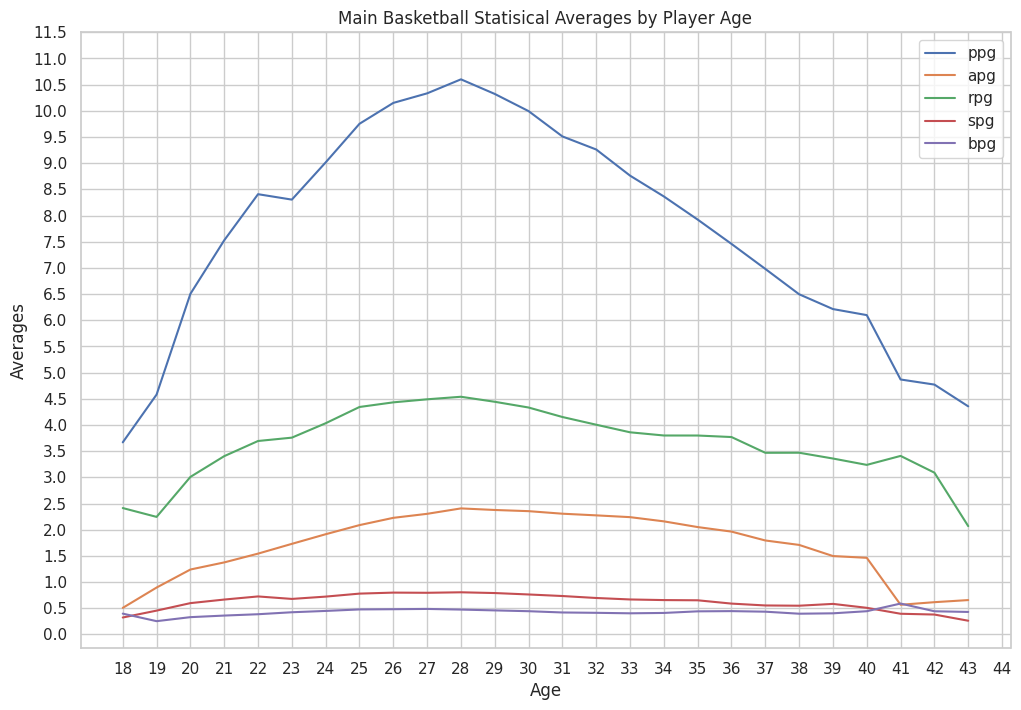

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))

# Plot each column by the age of the athlete
for column in bball_age_df.columns[:]:
    sns.lineplot(x='age', y=column, data=bball_age_df, label=column)


plt.yticks(np.arange(0, 12, 0.5))
plt.xticks(np.arange(18, 45, 1))
plt.xlabel('Age')
plt.ylabel('Averages')
plt.title('Main Basketball Statisical Averages by Player Age')


plt.legend()
plt.show()


This gives good indication at a trend such as players peaking offensively from 26 to 30

###Split between NBA and NCAA

Splitting the data between the NBA and NCAA allows us to see the difference between NBA players hitting their peaks and college players usually hitting their peak as there is some overlap in the ages, but college players are much younger.

Group the NBA players by age

In [ ]:
# Create copy of new_NCCA_NBA_df
new_NBA_df = new_NCCA_NBA_df.copy()

# Get rows of players not in the NCAA
new_NBA_df = new_NBA_df[new_NBA_df["lg"] != "NCAA"]

# Group by age
aggregation_functions = {
    'ppg': 'mean',
    'apg': 'mean',
    'rpg': 'mean',
    'spg': 'mean',
    'bpg': 'mean'
}

bball_nba_age_df = new_NBA_df.groupby(by='age', sort=True).agg(aggregation_functions)

Display the average age of NBA players and their stats

In [ ]:
# Average stats by age
bball_nba_age_df

,ppg,apg,rpg,spg,bpg
age,,,,,
18.0,3.668221,0.506850,2.413308,0.322955,0.397007
19.0,7.707370,1.520436,3.553130,0.570119,0.498113
20.0,8.193140,1.659148,3.691728,0.625760,0.483416
21.0,8.907376,1.742970,3.925949,0.673587,0.494746
22.0,7.911687,1.620592,3.603753,0.640114,0.415792
23.0,8.303670,1.729615,3.757900,0.677840,0.423297
24.0,9.014667,1.913445,4.033204,0.722089,0.448493
25.0,9.752218,2.087531,4.343483,0.779243,0.477188
26.0,10.150682,2.226459,4.431899,0.798378,0.481249


Reset index

In [ ]:
# Reset index
bball_nba_age_df = bball_nba_age_df.reset_index()

 We will be using the `matplot` and `seaborn` library again

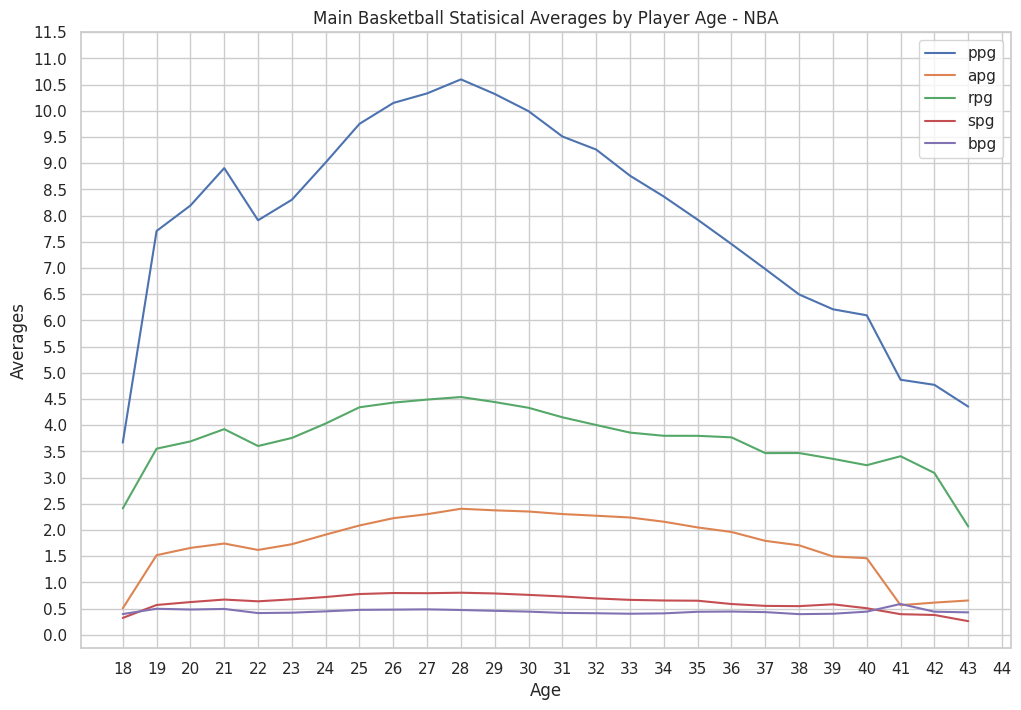

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))

# Plot each column by the age of the athlete
for column in bball_nba_age_df.columns[1:]:
    sns.lineplot(x='age', y=column, data=bball_nba_age_df, label=column)


plt.yticks(np.arange(0, 12, 0.5))
plt.xticks(np.arange(18, 45, 1))
plt.xlabel('Age')
plt.ylabel('Averages')
plt.title('Main Basketball Statisical Averages by Player Age - NBA')


plt.legend()
plt.show()

Our assessment above is still correct, given the graph NBA players hit their peaks offensively from about age 26 to age 31. It appears the defense stats like steals and blocks stay fairly consistent.

**NCAA Players**

Group the NCAA players by age

In [ ]:
# Create copy of new_NCCA_NBA_df
new_NCAA_df = new_NCCA_NBA_df.copy()

# Get rows of players not in the NCAA
new_NCAA_df = new_NCAA_df[new_NCAA_df["lg"] == "NCAA"]

# Group by age
aggregation_functions = {
    'ppg': 'mean',
    'apg': 'mean',
    'rpg': 'mean',
    'spg': 'mean',
    'bpg': 'mean'
}

bball_ncaa_age_df = new_NCAA_df.groupby(by='age', sort=True).agg(aggregation_functions)

Display the average age of NBA players and their stats

In [ ]:
# Average stats by age
bball_ncaa_age_df

,ppg,apg,rpg,spg,bpg
age,,,,,
19.0,4.540762,0.886988,2.227687,0.453073,0.250073
20.0,6.444502,1.224520,2.984233,0.596670,0.324390
21.0,7.451716,1.355176,3.376816,0.665441,0.353108
22.0,8.486822,1.530462,3.708071,0.735982,0.381707


Reset the index

In [ ]:
# Reset index
bball_ncaa_age_df = bball_ncaa_age_df.reset_index()

 We will be using the `matplot` and `seaborn` library for this problem to create a <ins>line graph</ins> visualizing the data for NCAA players

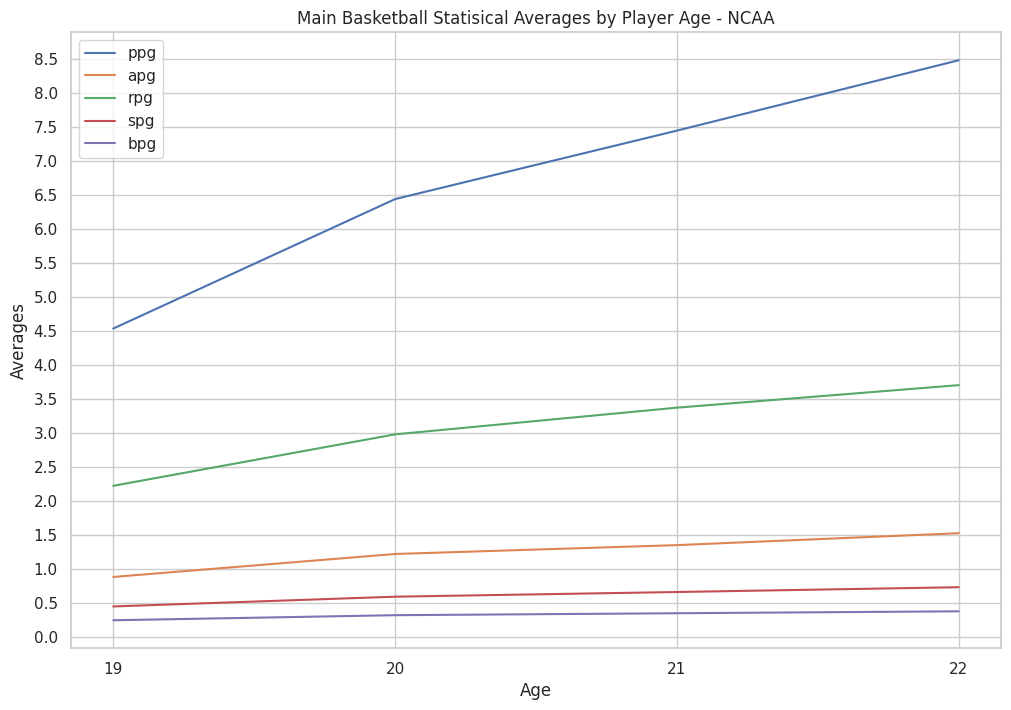

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))

# Plot each column by the age of the athlete
for column in bball_ncaa_age_df.columns[1:]:
    sns.lineplot(x='age', y=column, data=bball_ncaa_age_df, label=column)


plt.yticks(np.arange(0, 9, 0.5))
plt.xticks(np.arange(19, 23))
plt.xlabel('Age')
plt.ylabel('Averages')
plt.title('Main Basketball Statisical Averages by Player Age - NCAA')


plt.legend()
plt.show()

College basketball players seem to hit their peak at age 22, which essentially means that they progressively get better the more time they spend playing in college.

### Exploring 3-point shooting in both the NBA and NCAA

Since the invention of Basketball, the strategy and dynamics of basketball have significantly evolved, particularly in the realm of 3-point shooting. Our analysis aims to explore and visualize this evolution by examining trends in 3-point attempts and successes within both the NBA and NCAA. By comparing these trends across these two distinct levels of basketball, we aim to understand how the game's approach to 3-point shooting has changed over the years, reflecting broader shifts in playing styles and tactics.

**NBA 3-point shooting**

We got the NBA players only and filtered from 1961 and onwards since before that year 3-point shooting line didn't exist.

In [ ]:
# Get NBA players only
NBA_df = new_NCCA_NBA_df[new_NCCA_NBA_df["lg"] != "NCAA"]

# Filter for seasons from 1967 onwards
NBA_df = NBA_df[NBA_df['season'] >= 1961]

We grouped by season and calculated the average 3 Point Attempt for the league.

In [ ]:
# Group by season and calculate average 3PA for the league
NBA_3PA_avg = NBA_df.groupby('season')['x3pa'].mean()

 We then used only `matplot` to create a <ins>line graph</ins> visualizing the data for NBA players

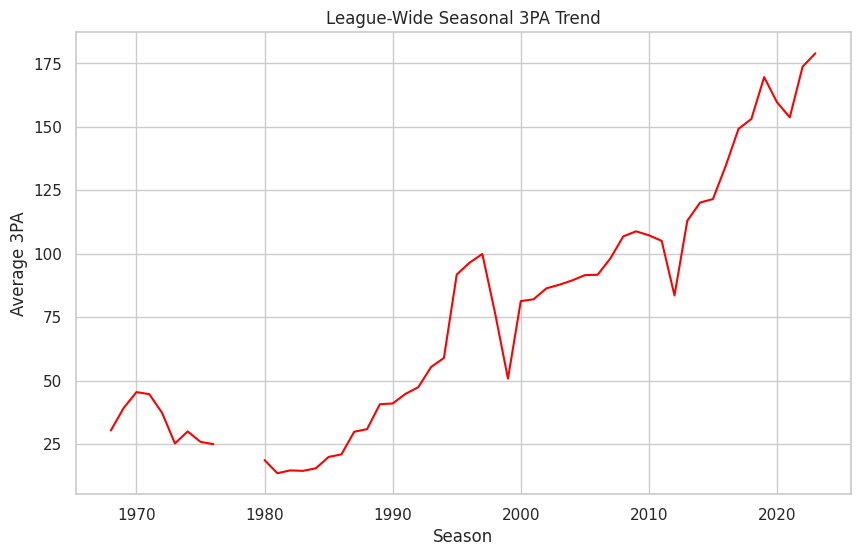

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NBA_3PA_avg, color='red', label='Average 3PA')
plt.title("League-Wide Seasonal 3PA Trend")
plt.xlabel('Season')
plt.ylabel('Average 3PA')
plt.grid(True)
plt.show()

The ongoing trend is that 3pt shooting has been increasing and look to continue to increase for future years. There are some noticable dips and blank spots that directly correlate with rule changes such as the NBA moving the 3pt line to a shorter distance in the 1995 season an then putting it back to its original position in the 1998 season. As well as the fact that the Golden State Warriors winning the 2015 NBA Championship primarily with shooters, influenced teams to emulate their success by building teams around 3pt shooting

When the ABA and NBA merged in 1976, the 3-point line wasn't part of the merger. It wasn't added back until 1979 for the 1980 season. Hence the gap in the graph between 1975 and 1980 as data were absent from 1976 to 1979.

We grouped by season and calculated the average 3 Point Field Goal % for the league. 3-Point % was calculated by the formula is 3P(3-Point Field Goals) / 3PA(3-Point Field Goal Attempts)

In [ ]:
# Group by season and calculate average 3P% for the league
NBA_3PP_avg = NBA_df.groupby('season')['x3p_percent'].mean()

 We again used `matplot` to create a <ins>line graph</ins> visualizing the data for NBA players

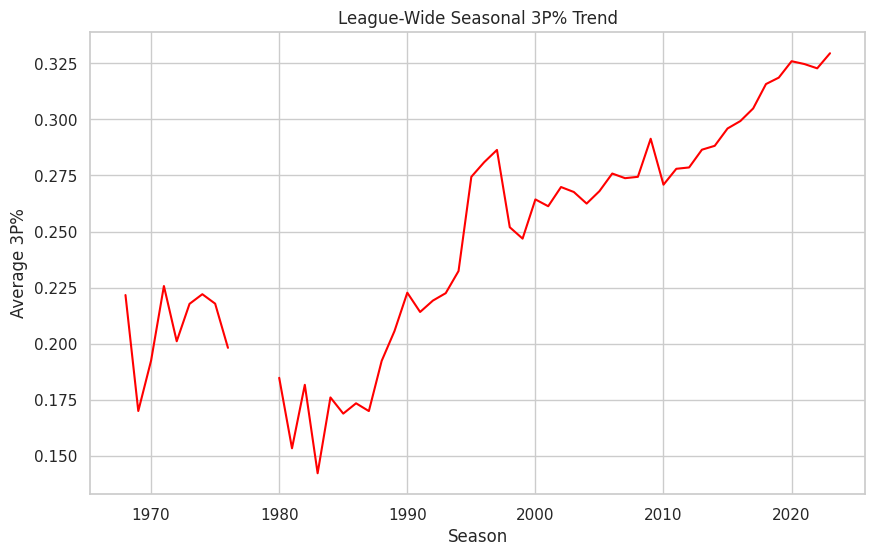

In [ ]:
# Plotting using seaborn
plt.figure(figsize=(10, 6))
plt.plot(NBA_3PP_avg, color='red', label='Average 3P%')
plt.title("League-Wide Seasonal 3P% Trend")
plt.xlabel('Season')
plt.ylabel('Average 3P%')
plt.grid(True)
plt.show()

This graph mirrors the trends seen in the 3-point attempts graph, including the dips and the gap, reflecting the same historical events in the league described above.

NCAA 3-point shooting since 2009

Get only the NCAA players from new_NCCA_NBA_df and grouped the players by season. Calculated the average 3-Point Field Goal Attempt

In [ ]:
# Get NCAA players only
NCAA_df = new_NCCA_NBA_df[new_NCCA_NBA_df["lg"] == "NCAA"]

# Group by season and calculate average 3P% for the league
NCAA_3PA_avg = NCAA_df.groupby('season')['x3pa'].mean()

We the used only matplot to create a line graph visualizing the data for NBA players

In [ ]:
NCAA_3PA_avg

season
2009    50.829776
2010    49.796540
2011    50.226788
2012    50.331157
2013    51.075956
2014    50.488366
2015    51.618303
2016    57.158421
2017    58.847926
2018    61.673052
2019    64.458713
2020    59.603630
2021    46.584276
Name: x3pa, dtype: float64

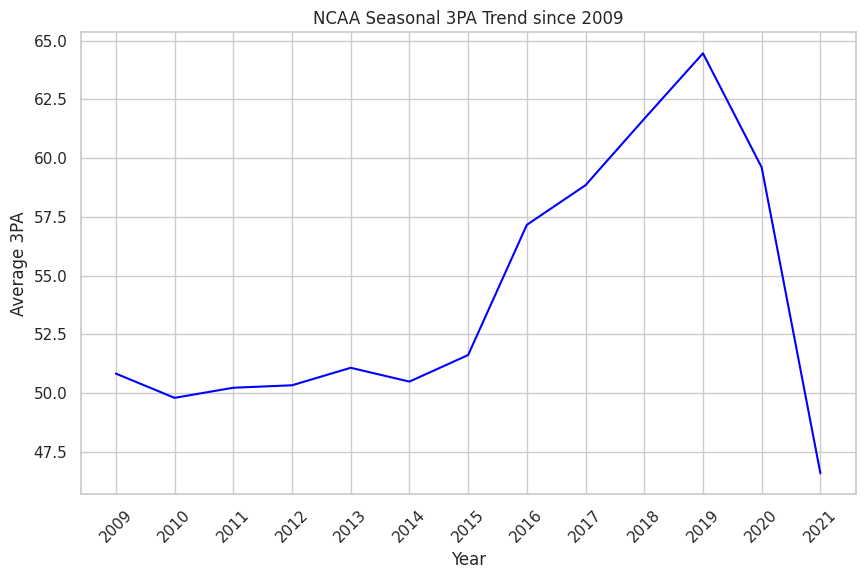

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NCAA_3PA_avg, color='blue')
plt.title("NCAA Seasonal 3PA Trend since 2009")
plt.xlabel("Year")
plt.ylabel("Average 3PA")

## Set x-axis ticks to display each year
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set a tick for every year

# Rotate labels incase they still overlap
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


We can see the noticable dip in the 2021 season as the NCAA move the 3pt line further back which discouraged players from attempting as many 3 pointers than prior years

We grouped by season and calculated the average 3 Point Field Goal % for the league. 3-Point % was calculated by the formula is 3P(3-Point Field Goals) / 3PA(3-Point Field Goal Attempts)

In [ ]:
# Group by season and calculate average 3P% for the league
league_seasonal_avg = NCAA_df.groupby('season')['x3p_percent'].mean().reset_index()

 We the used both the `matplot` and `seaborn` library to create a <ins>line graph</ins> visualizing the data for NBA players

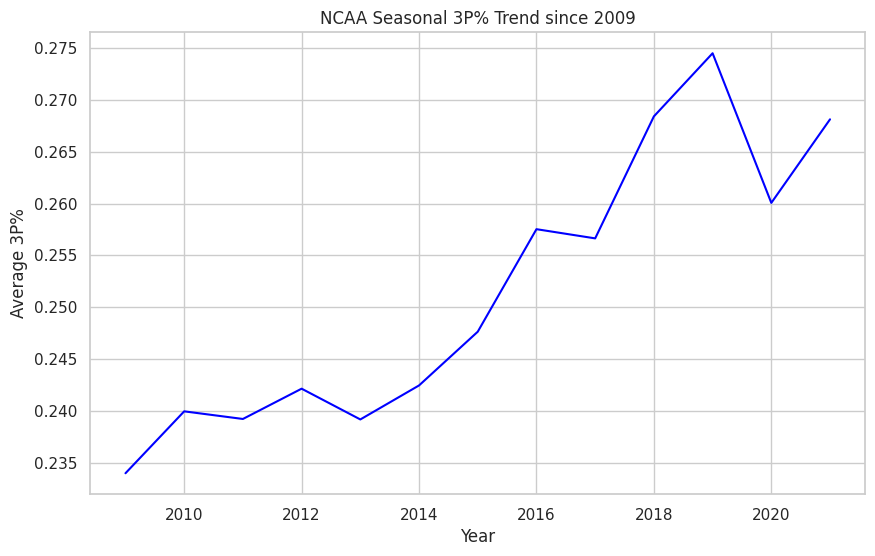

In [ ]:
# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=league_seasonal_avg, x='season', y='x3p_percent', color='blue')
plt.title("NCAA Seasonal 3P% Trend since 2009")
plt.xlabel("Year")
plt.ylabel("Average 3P%")
plt.grid(True)
plt.show()

## Exploring the average age of NBA All Stars

Each year in the middle of the season, the NBA selects a varying amount of players as being the best in league. The dependency of the selections vary from popularity, to skill, to team proficiency, but overall could be a great identifying tool for us to identify that a player is highly proficient. Luckily for us, NBA all star selections by year are available on wikipedia!

In [ ]:
nba_all_stars_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_NBA_All-Stars')[1]

nba_all_stars_df.head()

,Player,#,Selections[c],Notes,Reference
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10]
1,LeBron James^,19,2005–2023,"Team captain in 2018,[11] 2019,[12] 2020,[13] ...",[15]
2,Kobe Bryant*,18,1998; 2000–2016,"Missed 2010,[16] 2014,[17] and 2015[18] games....",[19]
3,Tim Duncan*,15,1998; 2000–2011; 2013; 2015,NaN,[20]
4,Kevin Garnett*,15,1997–1998; 2000–2011; 2013,Missed 2008[21] game. MVP of the 2003 game. Re...,[23]


In [ ]:
def expand_years(mixed_years):
    expanded_years = []
    for year_group in mixed_years.split('; '):
        if '–' in year_group:  # If it's a year range
            start_year, end_year = map(int, year_group.split('–'))
            expanded_years.extend(range(start_year, end_year + 1))
        else:  # If it's an individual year
            expanded_years.append(int(year_group))
    return expanded_years

def remove_trailing_non_alphabetical(s):
    return s.rstrip('0123456789!@#$%^&*()-_=+,.<>?/;:"\'[ ]{}`~')

In [ ]:
nba_all_stars_df['Selection Years'] = nba_all_stars_df['Selections[c]'].apply(expand_years)
nba_all_stars_df['Player Name'] = nba_all_stars_df['Player'].apply(lambda x: remove_trailing_non_alphabetical(str(x)))
nba_all_stars_df.at[0, 'Player Name'] = "Kareem Abdul-Jabbar"

nba_all_stars_df

,Player,#,Selections[c],Notes,Reference,Selection Years,Player Name
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],"[1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...",Kareem Abdul-Jabbar
1,LeBron James^,19,2005–2023,"Team captain in 2018,[11] 2019,[12] 2020,[13] ...",[15],"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",LeBron James
2,Kobe Bryant*,18,1998; 2000–2016,"Missed 2010,[16] 2014,[17] and 2015[18] games....",[19],"[1998, 2000, 2001, 2002, 2003, 2004, 2005, 200...",Kobe Bryant
3,Tim Duncan*,15,1998; 2000–2011; 2013; 2015,NaN,[20],"[1998, 2000, 2001, 2002, 2003, 2004, 2005, 200...",Tim Duncan
4,Kevin Garnett*,15,1997–1998; 2000–2011; 2013,Missed 2008[21] game. MVP of the 2003 game. Re...,[23],"[1997, 1998, 2000, 2001, 2002, 2003, 2004, 200...",Kevin Garnett
...,...,...,...,...,...,...,...
445,Jayson Williams,1,1998,NaN,[544],[1998],Jayson Williams
446,Mo Williams,1,2009,Replacement selection in 2009[545] game,[546],[2009],Mo Williams
447,Kevin Willis,1,1992,Replacement selection in 1992[22] game,[547],[1992],Kevin Willis
448,Metta World Peace[d],1,2004,NaN,[548],[2004],Metta World Peace[d


In [ ]:
# Expand the list of All-Star years into individual rows
expanded_all_stars_df = nba_all_stars_df.explode('Selection Years')

In [ ]:
expanded_all_stars_df.head(20)

,Player,#,Selections[c],Notes,Reference,Selection Years,Player Name
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1970,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1971,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1972,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1973,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1974,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1975,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1976,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1977,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1979,Kareem Abdul-Jabbar
0,Kareem Abdul-Jabbar*[a],19,1970–1977; 1979–1989,Missed 1973[9] game. Replacement selection in ...,[10],1980,Kareem Abdul-Jabbar


In [ ]:
merged_all_stars_df = pd.merge(new_NCCA_NBA_df, expanded_all_stars_df, left_on=['player', 'season'], right_on=['Player Name', 'Selection Years'], how='left')

# Create a new column 'selected' and fill with 1 if selected, 0 otherwise
merged_all_stars_df['selected'] = merged_all_stars_df['Selection Years'].notnull().astype(int)

# Drop redundant columns
merged_all_stars_df = merged_all_stars_df.drop(['Player Name', 'Selection Years'], axis=1)

In [ ]:
merged_all_stars_df

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,apg,rpg,spg,bpg,Player,#,Selections[c],Notes,Reference,selected
0,1,1947,1,Al Brightman,F,23.0,1.0,BAA,BOS,58,...,1.034483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3,1947,3,Al Negratti,F-C,25.0,1.0,BAA,WSC,11,...,0.454545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4,1947,4,Angelo Musi,G,28.0,1.0,BAA,PHW,60,...,0.433333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,206,1948,4,Angelo Musi,G,29.0,2.0,BAA,PHW,43,...,0.232558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,344,1949,4,Angelo Musi,G,30.0,3.0,BAA,PHW,58,...,1.396552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72826,NaN,2021,84194,Leandre Howard,NaN,19.0,1.0,NCAA,Mississippi Valley St.,15,...,0.066667,4.266667,0.266667,1.066667,NaN,NaN,NaN,NaN,NaN,0
72827,NaN,2021,84203,Franck Kepnang,NaN,19.0,1.0,NCAA,Oregon,16,...,0.125000,1.250000,0.125000,1.125000,NaN,NaN,NaN,NaN,NaN,0
72828,NaN,2021,84207,Zane Butler,NaN,19.0,1.0,NCAA,SIU Edwardsville,12,...,0.250000,0.750000,0.333333,0.000000,NaN,NaN,NaN,NaN,NaN,0
72829,NaN,2021,84208,Isaiah Williams,NaN,22.0,4.0,NCAA,Jackson St.,12,...,0.666667,5.166667,0.916667,0.166667,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
all_stars_age = merged_all_stars_df[merged_all_stars_df['selected'] == 1].groupby('season')['age'].mean()
all_stars_age

season
1951    24.666667
1952    26.300000
1953    26.600000
1954    26.904762
1955    27.380952
          ...    
2019    27.884615
2020    26.280000
2021    27.370370
2022    27.407407
2023    27.538462
Name: age, Length: 72, dtype: float64

We can now take this information from Wikipedia on NBA all stars and display the change in average age over time. You can see from the graph below that the results very closely align with our findings above through player statistics. This data tells us that the best players tend to be around 27-29 years old.

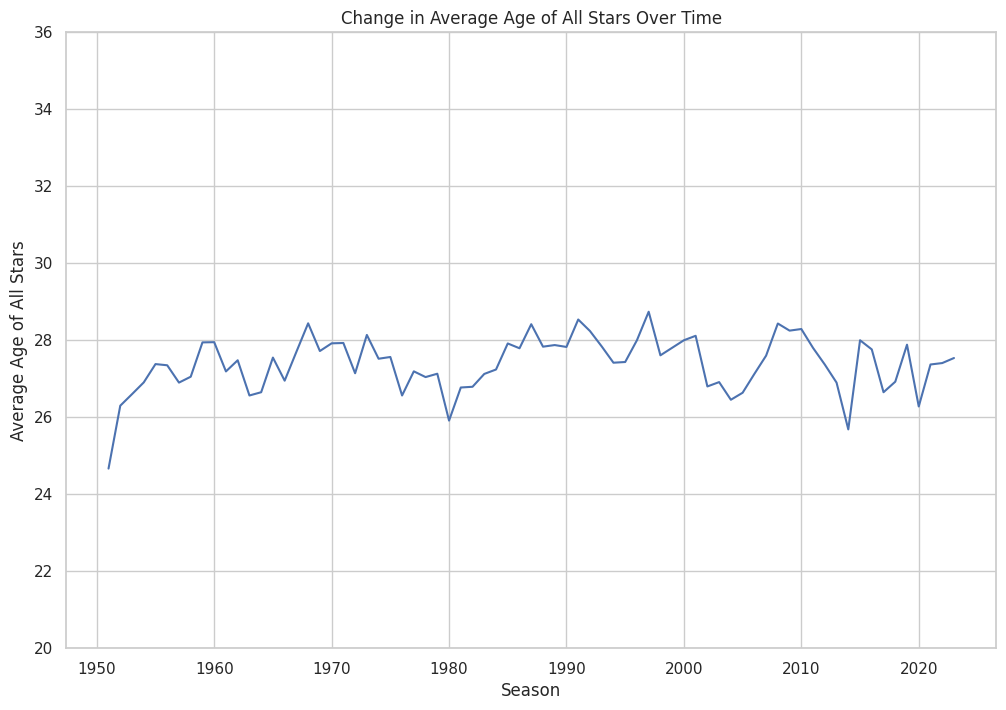

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

plt.plot(all_stars_age.index, all_stars_age.values, linestyle='-', color='b')
plt.title('Change in Average Age of All Stars Over Time')
plt.xlabel('Season')
plt.ylabel('Average Age of All Stars')
plt.ylim(20, 36)

plt.show()

## Top players across main Statistical Categories

In [ ]:
#Top 10 player seasons for each statistic
top_ppg = new_NCCA_NBA_df.nlargest(10, 'ppg')
top_rpg = new_NCCA_NBA_df.nlargest(10, 'rpg')
top_apg = new_NCCA_NBA_df.nlargest(10, 'apg')
top_spg = new_NCCA_NBA_df.nlargest(10, 'spg')
top_bpg = new_NCCA_NBA_df.nlargest(10, 'bpg')

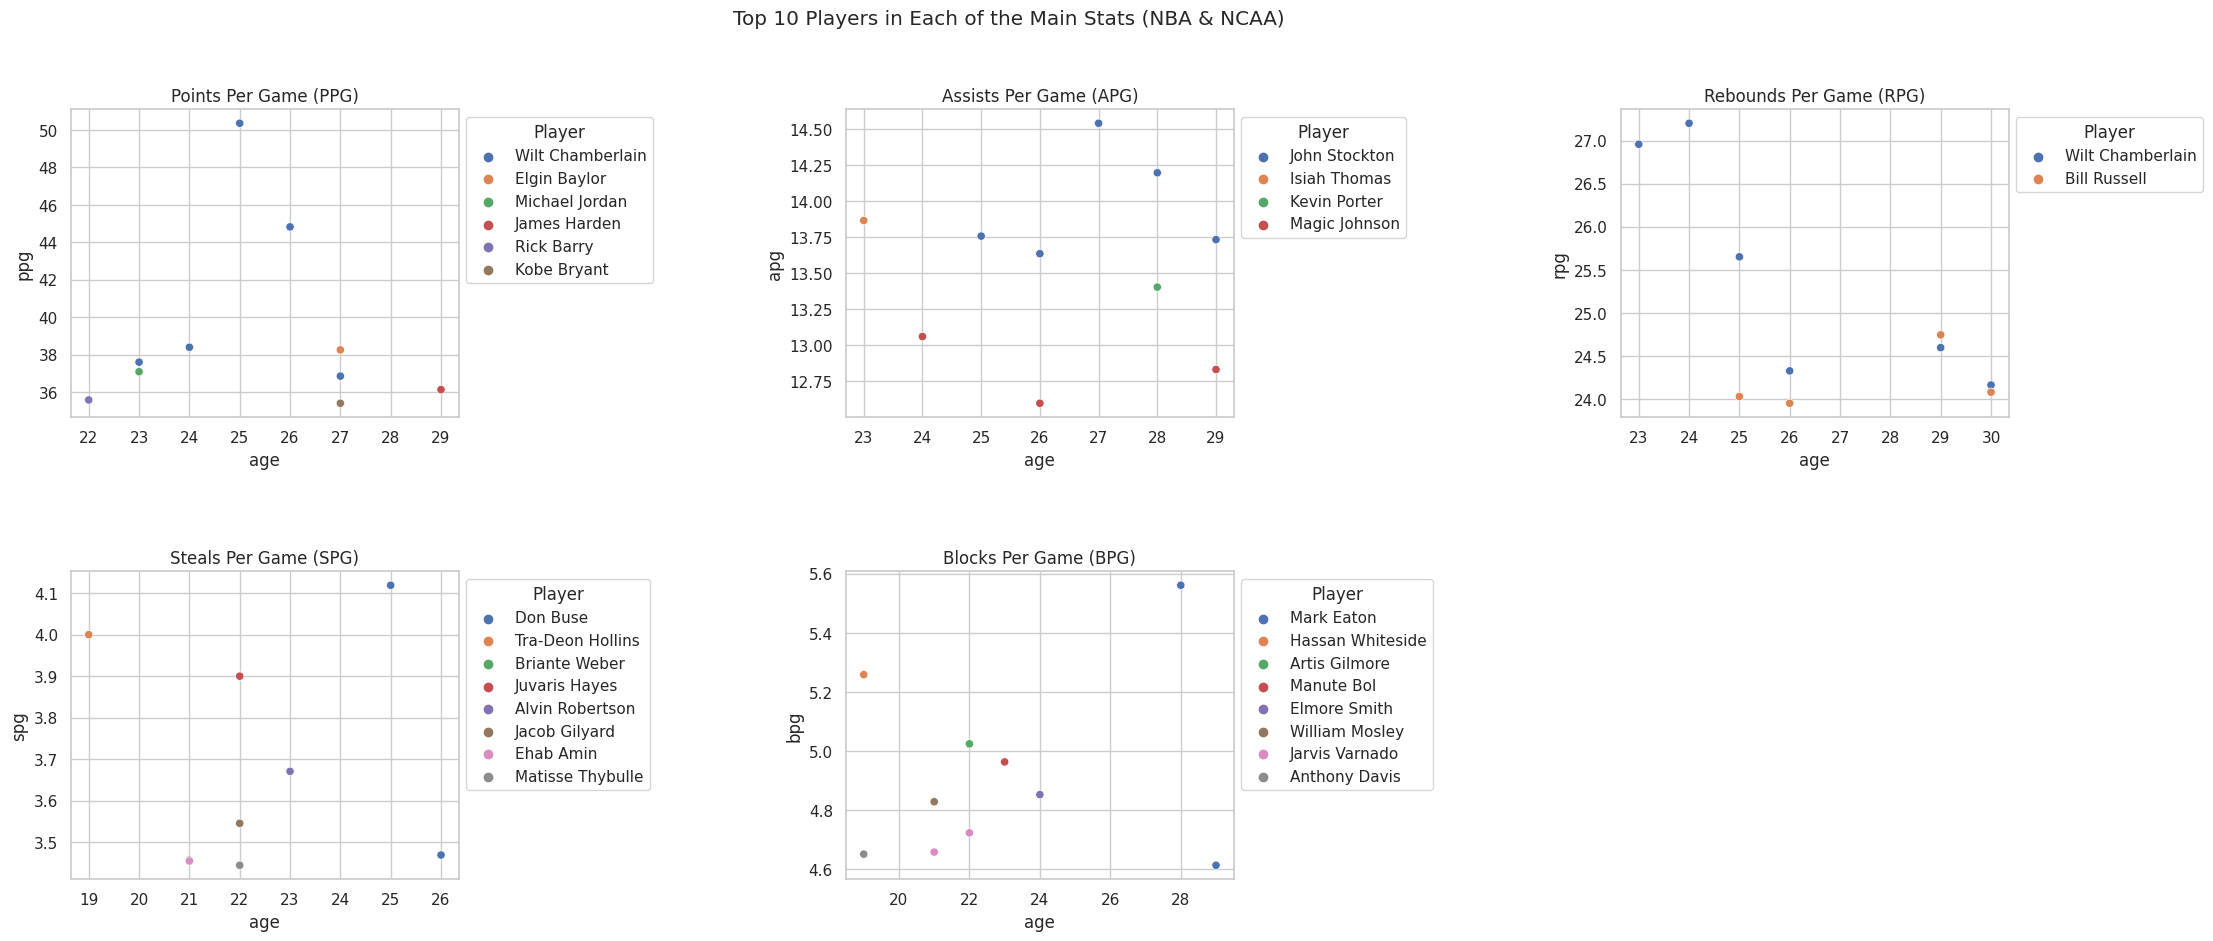

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle('Top 10 Players in Each of the Main Stats (NBA & NCAA)')
plt.subplots_adjust(wspace=1, hspace=0.5)

#delete 6th grid
if axes.size >= 6:
    fig.delaxes(axes.flatten()[5])

for ax_row in axes:
  for ax in ax_row:
      ax.grid(True)

# plot for pts
sns.scatterplot(x='age', y='ppg', hue='player', data=top_ppg, ax=axes[0, 0])
axes[0, 0].set_title('Points Per Game (PPG)')
axes[0, 0].legend(title='Player', loc='upper left', bbox_to_anchor=(1, 1))


# plot for asts
sns.scatterplot(x='age', y='apg', hue='player', data=top_apg, ax=axes[0, 1])
axes[0, 1].set_title('Assists Per Game (APG)')
axes[0, 1].legend(title='Player', loc='upper left', bbox_to_anchor=(1, 1))


# plot for rebs
sns.scatterplot(x='age', y='rpg', hue='player', data=top_rpg, ax=axes[0, 2])
axes[0, 2].set_title('Rebounds Per Game (RPG)')
axes[0, 2].legend(title='Player', loc='upper left', bbox_to_anchor=(1, 1))


# plot for stls
sns.scatterplot(x='age', y='spg', hue='player', data=top_spg, ax=axes[1, 0])
axes[1, 0].set_title('Steals Per Game (SPG)')
axes[1, 0].legend(title='Player', loc='upper left', bbox_to_anchor=(1, 1))


# plot for blks
sns.scatterplot(x='age', y='bpg', hue='player', data=top_bpg, ax=axes[1, 1])
axes[1, 1].set_title('Blocks Per Game (BPG)')
axes[1, 1].legend(title='Player', loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


We noticed here the majority of stats are dominated by NBA stars. What is also very noticably is that rebounds were primarly dominated by only two main players in the course of NBA history. As these single season records still hold to this day.

The closest we've seen to achieveing 20 rpg season in the modern day NBA is Andre Drummond at roughly 16rpg. This change trends of the NBA changes amongst eras is particularly intriguing.

Notice the **rpg** column below

In [ ]:
new_NCCA_NBA_df[(new_NCCA_NBA_df['player']=='Andre Drummond')& (new_NCCA_NBA_df['season']== 2018)]

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,stl,blk,tov,pf,pts,ppg,apg,rpg,spg,bpg
21729,26937,2018,4064,Andre Drummond,C,24.0,6.0,NBA,DET,78,...,114.0,127.0,200.0,250.0,1171.0,15.012821,3.038462,15.987179,1.461538,1.628205


# Part 4: Modeling

**Imports**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score


## Linear Regression

One of the things we are curious to know is if we can predict the ages of NBA players based on their stats. We decided to use linear regression because it provides a straightforward way to model a relationship  between a players in game counting stats. We would want the model to predict a younger age for a player that has less minutes played and lower averages. Then the converse is true, older player with more minutes played and higher averages.

In [ ]:
#Drop any rows with NaNs in age
ML_new_NCCA_NBA_df = new_NCCA_NBA_df.dropna(subset=['age'])

# Drop uneccessary rows
X = ML_new_NCCA_NBA_df.drop(columns = ['age','seas_id','season','player_id'])

X = X.select_dtypes(exclude=['object'])
X =X.fillna(0)
y = ML_new_NCCA_NBA_df ['age']

Split into test and training sets. Then form predictions

In [ ]:
# splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Predict and evaluate the model

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print('R-squared: ', r2)

R-squared:  0.9202928256346143


###Correlation between Player Age and stats

By doing this we can see a good portion of our stats have a relationship with a players age. Lets go a step further and form a correlation matrix to view the relationship between different features.

<ipython-input-97-00656c9419bd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = corr_mat_df.corr()


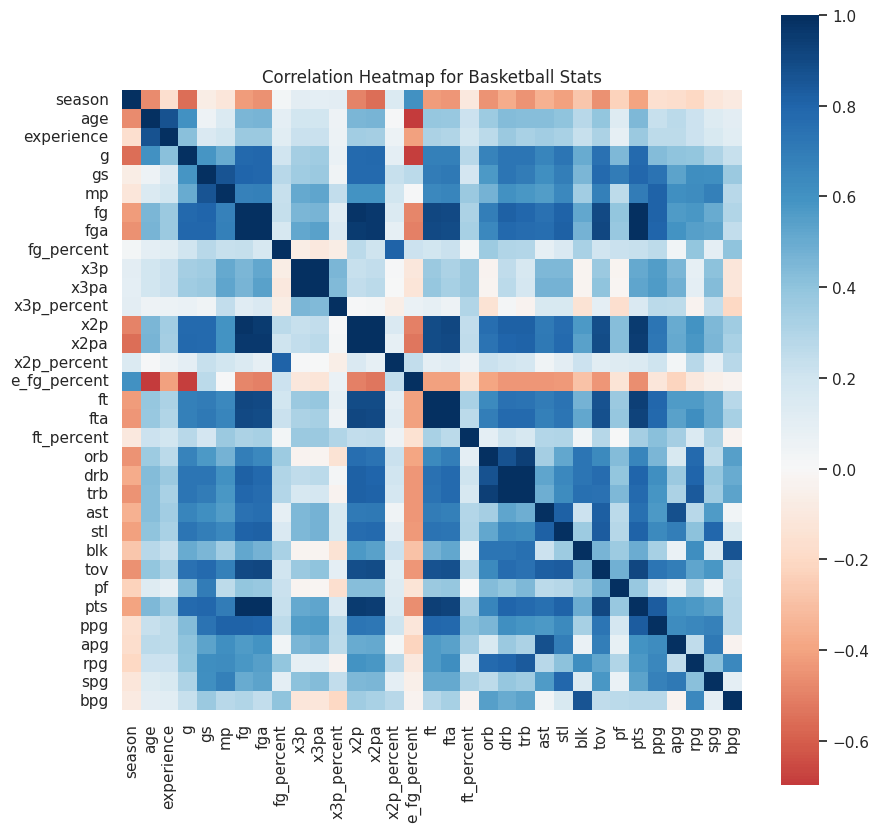

In [ ]:

corr_mat_df = ML_new_NCCA_NBA_df.drop(columns = ['seas_id','player_id'])



corr_mat = corr_mat_df.corr()

plt.figure(figsize=(10, 10))


sns.heatmap(corr_mat, annot=False, cmap="RdBu", center=0, cbar=True, square=True, fmt=".2f")


plt.title("Correlation Heatmap for Basketball Stats")


plt.show()

We can notice immediately that the reason why our model appears to perform well is due to how correlated **age and experienc**e are. Of course a player will gain more experience years as they get old! Let's drop this from our model and rerun

In [ ]:
# Rerun model while dropping experience column
X = ML_new_NCCA_NBA_df.drop(columns = ['age','seas_id','season','player_id','experience'])

X = X.select_dtypes(exclude=['object'])
X =X.fillna(0)
y = ML_new_NCCA_NBA_df ['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R-squared: ', r2)

R-squared:  0.5915048221408439


###Creating ranges for player age and correlating with player stats

Notice the performance of the model, decreases once we remove experience. Let's See what happens when we try the model instead  by creating a new column that captures a range of ages instead of a singular age.

First let's make a function to get the age of a player in a 5 year time frame, with the exception of 38+ (6 years 38-43). Although there is a short list of players that play past 41.

In [ ]:
# Function for selecting age range
def categorize_age(age):
    if 18 <= age <= 22:
        return '18-22'
    elif 23 <= age <= 27:
        return '23-27'
    elif 28 <= age <= 32:
        return '28-32'
    elif 33 <= age <= 37:
        return '33-37'
    elif age >= 38:
        return '38+'

In [ ]:
NCCA_NBA_age_range_df = ML_new_NCCA_NBA_df.copy()
NCCA_NBA_age_range_df['age_range'] = NCCA_NBA_age_range_df['age'].apply(categorize_age)
#Drop unecessary columns
NCCA_NBA_age_range_df = NCCA_NBA_age_range_df.drop(columns = ['age','seas_id','season','player_id','experience'])

Use age range as a categorical variable and rerun model

In [ ]:
NCCA_NBA_age_range_df = pd.get_dummies(NCCA_NBA_age_range_df, columns=['age_range'])


X = NCCA_NBA_age_range_df.select_dtypes(exclude=['object']).drop(columns= [col for col in NCCA_NBA_age_range_df.columns if col.startswith('age_range_')])

# one-hot encoded 'age_range' columns as y
y = NCCA_NBA_age_range_df.filter(regex='^age_range_', axis=1)
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared: ', r2)

R-squared:  0.2952202276968826


It appears as the model is better when we have a singular age then when the age is in a range. Let's plot another correlation matrix to observe further


<ipython-input-102-5b9be6321715>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = corr_mat_df.corr()


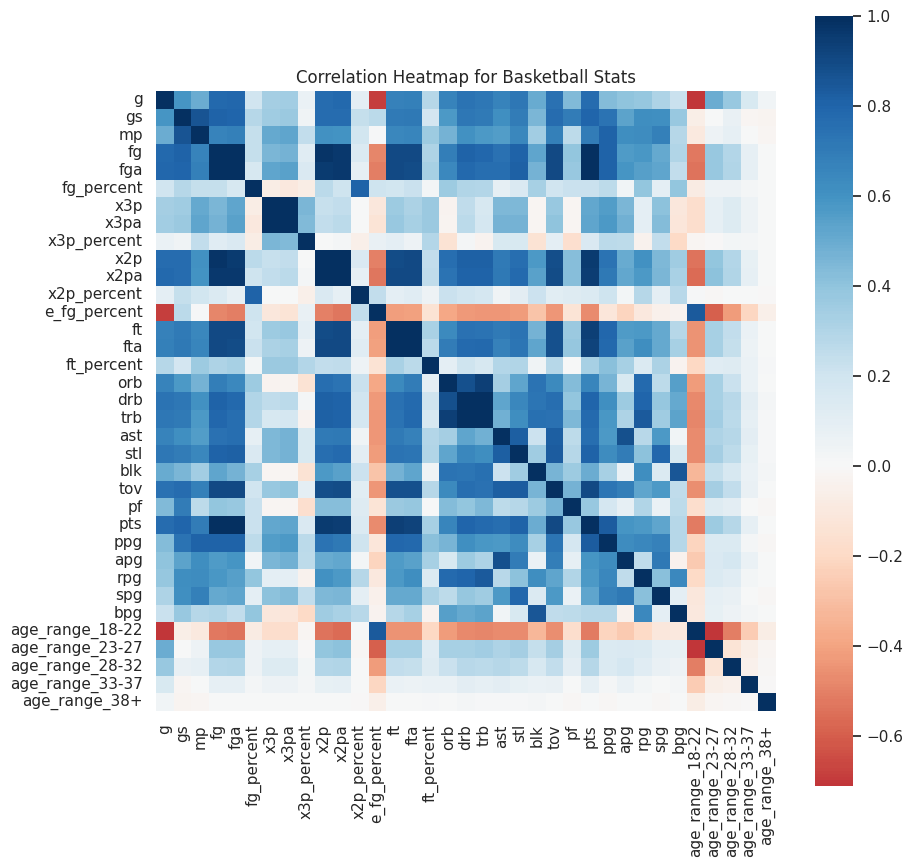

In [ ]:

corr_mat_df = NCCA_NBA_age_range_df



corr_mat = corr_mat_df.corr()

plt.figure(figsize=(10, 10))


sns.heatmap(corr_mat, annot=False, cmap="RdBu", center=0, cbar=True, square=True, fmt=".2f")


plt.title("Correlation Heatmap for Basketball Stats")


plt.show()

There appears to be high variability within an age group espeically as a player gets into an older age group or is in the youngest. The age groups 23-27 and 28-32 seem to have better correlation across stat categories than the others

## Random Forest Regression

We were interested to see if we were able to use a model to predict if a player is considered a good 3-pointer shooter based on many game statistics such as FG%, FGA, 2PT%, 2PA, FT%, FTA, POS(Player Position), Experience, MP(Minutes Played), Total PTS(points), Turnover Rates(tov), Efficiency Field Goal Percentage, and Rebounds per game. Predicting a player's 3-point shooting percentage (3P%) is a regression problem, not a classification problem, as we're predicting a continuous outcome (the percentage).

We decided to use Random Forest Regression because it would be more accurate compared to linear models, as these relationships between various performance metrics and outcomes listed above are often complex and not strictly linear, especially in sports.

To assess the effectiveness of our Random Forest Regression model, we will primarily focus on the R-squared score. This metric is crucial as it indicates the proportion of variance in the dependent variable that is predictable from the independent variables. An R-squared score approaching 1 signifies a high level of accuracy in the model's predictions. Additionally, we have employed the Mean Squared Error (MSE) metric. MSE helps us understand the average squared difference between the observed actual outcomes and the outcomes predicted by the model, with lower values indicating better model performance.

We first copied new_NCCA_NBA_df into a new dataframe and handled NaN

In [ ]:
# Copy the new_NCCA_NBA_df
three_pt_df = new_NCCA_NBA_df.copy()

# Handle NaN values after replacement
three_pt_df.fillna(0, inplace=True)

In [ ]:
three_pt_df.dtypes

seas_id           int64
season            int64
player_id         int64
player           object
pos              object
age             float64
experience      float64
lg               object
tm               object
g                 int64
gs              float64
mp              float64
fg                int64
fga               int64
fg_percent      float64
x3p             float64
x3pa            float64
x3p_percent     float64
x2p               int64
x2pa              int64
x2p_percent     float64
e_fg_percent    float64
ft                int64
fta               int64
ft_percent      float64
orb             float64
drb             float64
trb             float64
ast             float64
stl             float64
blk             float64
tov             float64
pf              float64
pts             float64
ppg             float64
apg             float64
rpg             float64
spg             float64
bpg             float64
dtype: object

We then added one-hot encoding in order to convert the categorical variables in the dataframe into a form that could be provided to the ML algorithm to do a better job in prediction.

In [ ]:
# Add one-hot encoded position columns
endcoded_three_pt_df = pd.get_dummies(three_pt_df, columns=['pos'])
endcoded_three_pt_df

,seas_id,season,player_id,player,age,experience,lg,tm,g,gs,...,pos_SF,pos_SF-C,pos_SF-PF,pos_SF-PG,pos_SF-SG,pos_SG,pos_SG-PF,pos_SG-PG,pos_SG-PG-SF,pos_SG-SF
0,1,1947,1,Al Brightman,23.0,1.0,BAA,BOS,58,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,1947,3,Al Negratti,25.0,1.0,BAA,WSC,11,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,1947,4,Angelo Musi,28.0,1.0,BAA,PHW,60,0.0,...,0,0,0,0,0,0,0,0,0,0
4,206,1948,4,Angelo Musi,29.0,2.0,BAA,PHW,43,0.0,...,0,0,0,0,0,0,0,0,0,0
5,344,1949,4,Angelo Musi,30.0,3.0,BAA,PHW,58,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86310,0,2021,84194,Leandre Howard,19.0,1.0,NCAA,Mississippi Valley St.,15,0.0,...,0,0,0,0,0,0,0,0,0,0
86316,0,2021,84203,Franck Kepnang,19.0,1.0,NCAA,Oregon,16,0.0,...,0,0,0,0,0,0,0,0,0,0
86319,0,2021,84207,Zane Butler,19.0,1.0,NCAA,SIU Edwardsville,12,0.0,...,0,0,0,0,0,0,0,0,0,0
86320,0,2021,84208,Isaiah Williams,22.0,4.0,NCAA,Jackson St.,12,0.0,...,0,0,0,0,0,0,0,0,0,0


**Preprocessing:** Created features and labels

As well as split the data into Train and Test

First, we tried to see how the model would do without any columns that contained statistics related to 3-points

In [ ]:
# Select the features and target
all_feature_columns = ['fg_percent','experience', 'ft_percent', 'fga', 'fta', 'x2p_percent', 'x2pa', 'mp', 'tov', 'pts', 'g','ast', 'e_fg_percent', 'rpg'] + [col for col in endcoded_three_pt_df.columns if col.startswith('pos_')]
features = endcoded_three_pt_df[all_feature_columns]
target = endcoded_three_pt_df['x3p_percent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

We used the RandomForestRegressor class in Scikit-Learn's ensemble library to perform Random Forest Regression. We initialize a Random Forest regression model named rf_model, fit the model to the training set, and then make predictions on the testing set.

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = rf_model.predict(X_test)

# Display mse
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r_squared = r2_score(y_test, predictions)
print(f"R-squared Score: {r_squared}")

Mean Squared Error: 0.006950538852454178
R-squared Score: 0.7778955457778644


**Model with 'x3PA' in training data**

Then data with 3-point attempts as 3-points in total will give the model too much information in regards to 3P%

In [ ]:
# Select the features and target
all_feature_columns = ['fg_percent','experience', 'ft_percent', 'fga', 'fta', 'x2p_percent', 'x2pa', 'mp', 'tov', 'pts', 'g','x3pa','ast', 'e_fg_percent', 'rpg'] + [col for col in endcoded_three_pt_df.columns if col.startswith('pos_')]
features = endcoded_three_pt_df[all_feature_columns]
target = endcoded_three_pt_df['x3p_percent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = rf_model.predict(X_test)

# Display mse
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r_squared = r2_score(y_test, predictions)
print(f"R-squared Score: {r_squared}")

Mean Squared Error: 0.004397095104812247
R-squared Score: 0.8594908352936816


The model excluding the 'x3pa' variable registered an R-squared score of 0.779, while its counterpart that includes 'x3pa' achieved a significantly higher R-squared score of 0.861, indicating a superior fit. In terms of Mean Squared Error, the model without 'x3pa' recorded a score of 0.0069, compared to a lower MSE of 0.0044 for the model with 'x3pa'. Given that a higher R-squared and a lower MSE typically denote a more accurate and reliable model, we have decided to proceed with the model that incorporates the 'x3pa' variable.

### NBA Players only

**Let's create a model for NBA players only**

Copied new_NCCA_NBA_df and got NBA players from new_NCCA_NBA_df

In [ ]:
three_pt_df_nba = new_NCCA_NBA_df.copy()
three_pt_df_nba = three_pt_df_nba[three_pt_df_nba["lg"] != "NCAA"]

Check that it's only NBA players

In [ ]:
three_pt_df_nba

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,stl,blk,tov,pf,pts,ppg,apg,rpg,spg,bpg
0,1,1947,1,Al Brightman,F,23.0,1.0,BAA,BOS,58,...,NaN,NaN,NaN,115.0,567.0,9.775862,1.034483,NaN,NaN,NaN
2,3,1947,3,Al Negratti,F-C,25.0,1.0,BAA,WSC,11,...,NaN,NaN,NaN,20.0,31.0,2.818182,0.454545,NaN,NaN,NaN
3,4,1947,4,Angelo Musi,G,28.0,1.0,BAA,PHW,60,...,NaN,NaN,NaN,120.0,562.0,9.366667,0.433333,NaN,NaN,NaN
4,206,1948,4,Angelo Musi,G,29.0,2.0,BAA,PHW,43,...,NaN,NaN,NaN,56.0,319.0,7.418605,0.232558,NaN,NaN,NaN
5,344,1949,4,Angelo Musi,G,30.0,3.0,BAA,PHW,58,...,NaN,NaN,NaN,108.0,478.0,8.241379,1.396552,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25276,31105,2023,5103,Tyrese Martin,SG,23.0,1.0,NBA,ATL,16,...,1.0,0.0,2.0,2.0,21.0,1.312500,0.125000,0.750000,0.062500,0.000000
25277,31107,2023,5104,TyTy Washington Jr.,PG,21.0,1.0,NBA,HOU,31,...,15.0,2.0,14.0,29.0,145.0,4.677419,1.516129,1.451613,0.483871,0.064516
25278,31114,2023,5105,Vince Williams Jr.,SG,22.0,1.0,NBA,MEM,15,...,6.0,2.0,5.0,12.0,30.0,2.000000,0.266667,1.000000,0.400000,0.133333
25279,31117,2023,5106,Walker Kessler,C,21.0,1.0,NBA,UTA,74,...,26.0,173.0,58.0,169.0,679.0,9.175676,0.932432,8.378378,0.351351,2.337838


Handled NaN values in the dataframe

In [ ]:
# Handle NaN values
three_pt_df_nba.fillna(0, inplace=True)

We then added one-hot encoding in order to convert the categorical variables in the dataframe into a form that could be provided to the ML algorithm to do a better job in prediction.

In [ ]:
# Add one-hot encoded position columns
encoded_nba_3pt = pd.get_dummies(three_pt_df_nba, columns=['pos'])

**Preprocessing:** Created features and labels

As well as split the data into Train and Test

In [ ]:
# Select the features and target
nba_feature_columns = ['fg_percent','experience', 'ft_percent', 'fga', 'fta', 'x2p_percent', 'x2pa', 'mp', 'tov', 'pts', 'g','x3pa','ast', 'e_fg_percent', 'rpg'] + [col for col in encoded_nba_3pt.columns if col.startswith('pos_')]
features = encoded_nba_3pt[nba_feature_columns]
target = encoded_nba_3pt['x3p_percent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

We again used the RandomForestRegressor class in Scikit-learn's ensemble library to perform Random Forest Regression.

In [ ]:
# Create and train the Random Forest model
rf_nba_model = RandomForestRegressor()
rf_nba_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_nba_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_2}")

Mean Squared Error: 0.010761534502194222
R-squared Score: 0.6826775570843426


### NCAA Players only

Copied new_NCCA_NBA_df and got NCAA players from new_NCCA_NBA_df

In [ ]:
three_pt_df_ncaaa = new_NCCA_NBA_df.copy()
three_pt_df_ncaaa = three_pt_df_ncaaa[three_pt_df_ncaaa["lg"] == "NCAA"]

Display NCAA players

In [ ]:
three_pt_df_ncaaa

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,stl,blk,tov,pf,pts,ppg,apg,rpg,spg,bpg
25282,NaN,2009,10002,DeAndrae Ross,NaN,20.0,2.0,NCAA,South Alabama,26,...,9.0,1.0,17.0,65.0,101.0,3.884615,1.192308,0.807692,0.346154,0.038462
25284,NaN,2009,10003,Pooh Williams,NaN,20.0,2.0,NCAA,Utah St.,34,...,14.0,8.0,38.0,116.0,202.0,5.941176,1.823529,1.941176,0.411765,0.235294
25285,NaN,2010,10003,Pooh Williams,NaN,21.0,3.0,NCAA,Utah St.,32,...,19.0,7.0,35.0,86.0,281.0,8.781250,2.187500,1.843750,0.593750,0.218750
25286,NaN,2011,10003,Pooh Williams,NaN,22.0,4.0,NCAA,Utah St.,33,...,7.0,3.0,43.0,96.0,286.0,8.666667,2.090909,1.636364,0.212121,0.090909
25287,NaN,2009,10005,Jesus Verdejo,NaN,22.0,4.0,NCAA,South Florida,27,...,13.0,0.0,49.0,46.0,329.0,12.185185,1.962963,2.962963,0.481481,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86310,NaN,2021,84194,Leandre Howard,NaN,19.0,1.0,NCAA,Mississippi Valley St.,15,...,4.0,16.0,19.0,87.0,59.0,3.933333,0.066667,4.266667,0.266667,1.066667
86316,NaN,2021,84203,Franck Kepnang,NaN,19.0,1.0,NCAA,Oregon,16,...,2.0,18.0,3.0,98.0,45.0,2.812500,0.125000,1.250000,0.125000,1.125000
86319,NaN,2021,84207,Zane Butler,NaN,19.0,1.0,NCAA,SIU Edwardsville,12,...,4.0,0.0,3.0,35.0,9.0,0.750000,0.250000,0.750000,0.333333,0.000000
86320,NaN,2021,84208,Isaiah Williams,NaN,22.0,4.0,NCAA,Jackson St.,12,...,11.0,2.0,23.0,68.0,70.0,5.833333,0.666667,5.166667,0.916667,0.166667


Handled NaN values

In [ ]:
# Handle NaN values
three_pt_df_ncaaa.fillna(0, inplace=True)

We then again added one-hot encoding

In [ ]:
# Add one-hot encoded position columns
encoded_ncaa_3pt = pd.get_dummies(three_pt_df_ncaaa, columns=['pos'])

**Preprocessing:** Created features and labels

As well as split the data into Train and Test

In [ ]:
# Select the features and target
ncaa_feature_columns = ['fg_percent', 'ft_percent', 'fga', 'fta', 'x2p_percent','x2pa', 'mp', 'experience','pts', 'ppg', 'apg', 'g','x3pa','ast', 'e_fg_percent'] + [col for col in encoded_ncaa_3pt.columns if col.startswith('pos_')]
features = encoded_ncaa_3pt[ncaa_feature_columns]
target = encoded_ncaa_3pt['x3p_percent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

We again used the RandomForestRegressor class in Scikit-learn's ensemble library to perform Random Forest Regression

In [ ]:
# Create and train the Random Forest model
rf_ncaa_model = RandomForestRegressor()
rf_ncaa_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_ncaa_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r_2}")

Mean Squared Error: 0.0023754708904054596
R-squared Score: 0.9174213321988733


### Actual Prediction

Utilizing data found on the official NBA website on player statistics per season, we wanted to see how close our model is at predicting the 3PT% of the top 3 players of the 2023 season with the highest 3PT% found on their website.

We'll use the first model as it contains both the NBA and NCAA players, as well as the model producing a great R2 score.

We used the latest league [average 3PT% ](https://www.basketball-reference.com/leagues/NBA_stats_per_game.html) as the threshold for 3PT%

In [ ]:
good_shooter_threshold = 0.36

**Luke Kennard** - a renonwed 27-year-old shooting guard for the Memphis Grizzlies

In [ ]:
luke_k_df = three_pt_df_nba[(three_pt_df_nba['player'] == "Luke Kennard") & (three_pt_df_nba['season'] == 2023)]

Display luke_k_df

In [ ]:
luke_k_df

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,stl,blk,tov,pf,pts,ppg,apg,rpg,spg,bpg
23922,30883,2023,4538,Luke Kennard,SG,26.0,6.0,NBA,TOT,59,...,32.0,5.0,46.0,82.0,546.0,9.254237,1.542373,2.677966,0.542373,0.084746


Since we had one-hot encoded 'pos' in our training data, apply the same to luke_k_df. Assigned any missing dummy columsn with 0 values as well

In [ ]:
# Applied one-hot encoded 'pos'
luke_k_encoded = pd.get_dummies(luke_k_df, columns=['pos'])

# Added missing dummy columns with 0 values
missing_cols = set(all_feature_columns) - set(luke_k_encoded.columns)
for c in missing_cols:
    luke_k_encoded[c] = 0

Since we tested only a few of the columns, we can only use those columns in the df that will be used to get a prediction

In [ ]:
# Selected only the columns that were used for training
luke_k_df_final = luke_k_encoded[all_feature_columns]

Predicting Luke's 3PT% and checking if he's a good 3-point shooter

In [ ]:
# Made the prediction
luke_k_predicted_3p = rf_model.predict(luke_k_df_final)

# Interpret the result
is_luke_k_good = luke_k_predicted_3p[0] >= good_shooter_threshold

print(f"Luke Kennard Predicted 3P%: {luke_k_predicted_3p[0]}")
print(f"Is Luke Kennard considered a good 3-point shooter by this model? {'Yes' if is_luke_k_good else 'No'}")

Luke Kennard Predicted 3P%: 0.49228
Is Luke Kennard considered a good 3-point shooter by this model? Yes


**Stephen Curry** - Well known 3-point shooter and 2023 All-star

In [ ]:
stephen_cr_df = three_pt_df_nba[(three_pt_df_nba['player'] == "Stephen Curry") & (three_pt_df_nba['season'] == 2023)]

Display - stephen_cr_df

In [ ]:
stephen_cr_df

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,stl,blk,tov,pf,pts,ppg,apg,rpg,spg,bpg
20835,31056,2023,3903,Stephen Curry,PG,34.0,14.0,NBA,GSW,56,...,52.0,20.0,179.0,117.0,1648.0,29.428571,6.285714,6.089286,0.928571,0.357143


Again, since we had one-hot encoded 'pos' in our training data, apply the same to luke_k_df. Assigned any missing dummy columsn with 0 values as well

In [ ]:
# Apply one-hot encoded 'pos'
stephen_cr_encoded = pd.get_dummies(stephen_cr_df, columns=['pos'])

# Add missing dummy columns with 0 values
missing_cols = set(all_feature_columns) - set(stephen_cr_encoded.columns)
for c in missing_cols:
    stephen_cr_encoded[c] = 0

In [ ]:
# Select only the columns that were used for training
stephen_cr_df_final = stephen_cr_encoded[all_feature_columns]

Predicting Stephen's 3PT% and checking if he's a good 3-point shooter

In [ ]:
# Make the prediction
stephen_cr_predicted_3p = rf_model.predict(stephen_cr_df_final)

# Interpret the result
is_stephen_cr_good = stephen_cr_predicted_3p[0] >= good_shooter_threshold

print(f"Luke Kennard Predicted 3P%: {stephen_cr_predicted_3p[0]}")
print(f"Is Luke Kennard considered a good 3-point shooter by this model? {'Yes' if is_stephen_cr_good else 'No'}")

Luke Kennard Predicted 3P%: 0.42856999999999973
Is Luke Kennard considered a good 3-point shooter by this model? Yes


#### Try Model Yourself

Check the model by inputing a player's name and season to check if they were a good 3-point shooter during that season!

Enter's the player's name between the quotes

Enter the season by changing the number to a given year

In [ ]:
player_name = "LeBron James"
season = 2023

Run the cell below to create a dataframe

In [ ]:
bb_player_df = three_pt_df_nba[(three_pt_df_nba['player'] == player_name) & (three_pt_df_nba['season'] == season)]

Check if the dataframe was created with the correct information

In [ ]:
bb_player_df

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,stl,blk,tov,pf,pts,ppg,apg,rpg,spg,bpg
17985,30873,2023,3463,LeBron James,PF,38.0,20.0,NBA,LAL,55,...,50.0,32.0,178.0,88.0,1590.0,28.909091,6.818182,8.309091,0.909091,0.581818


In [ ]:
# Apply one-hot encoded 'pos'
bb_player_encoded = pd.get_dummies(bb_player_df, columns=['pos'])

# Add missing dummy columns with 0 values
missing_cols = set(all_feature_columns) - set(bb_player_encoded.columns)
for c in missing_cols:
    bb_player_encoded[c] = 0

In [ ]:
# Now select only the columns that were used for training
bb_player_df_final = bb_player_encoded[all_feature_columns]

Lastly run the cell below to run the model on the player and season you chose earlier, and see the results!

In [ ]:
# Make the prediction
bb_player_predicted_3p = rf_model.predict(bb_player_df_final)

# Interpret the result
is_bb_player_good = bb_player_predicted_3p[0] >= good_shooter_threshold

print(f"{player_name} Predicted 3P%: {bb_player_predicted_3p[0]}")
print(f"Is {player_name} considered a good 3-point shooter by this model? {'Yes' if is_bb_player_good else 'No'}")

LeBron James Predicted 3P%: 0.32503000000000043
Is LeBron James considered a good 3-point shooter by this model? No


## Neural Network - 2023-2024 NBA All Star Predictions

We will now use our player statistics dataframe combined with the all star selections to train a neural network to predict the 2023 all stars. We don't have much data on 2023 rookies who haven't played before, so we only included players in our assessment that also played in 2022.

In [ ]:
merged_all_stars_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'pos', 'age', 'experience',
       'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa',
       'x3p_percent', 'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft',
       'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts', 'ppg', 'apg', 'rpg', 'spg', 'bpg', 'Player', '#',
       'Selections[c]', 'Notes', 'Reference', 'selected'],
      dtype='object')

We then selected the specific columns we'll need

In [ ]:
predict_all_stars_df = merged_all_stars_df[['season', 'player', 'age', 'experience', 'gs', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'selected']]
predict_all_stars_df.head()

,season,player,age,experience,gs,ast,stl,blk,tov,pf,pts,selected
0,1947,Al Brightman,23.0,1.0,NaN,60.0,NaN,NaN,NaN,115.0,567.0,0
1,1947,Al Negratti,25.0,1.0,NaN,5.0,NaN,NaN,NaN,20.0,31.0,0
2,1947,Angelo Musi,28.0,1.0,NaN,26.0,NaN,NaN,NaN,120.0,562.0,0
3,1948,Angelo Musi,29.0,2.0,NaN,10.0,NaN,NaN,NaN,56.0,319.0,0
4,1949,Angelo Musi,30.0,3.0,NaN,81.0,NaN,NaN,NaN,108.0,478.0,0


**Preprocessing:** Convert column(s) to numerical representation

In [ ]:
nn_all_stars_df = predict_all_stars_df.copy().dropna()
player_mapping = dict(enumerate(nn_all_stars_df['player'].unique()))
reverse_player_mapping = {v: k for k, v in player_mapping.items()}
nn_all_stars_df['player'] = nn_all_stars_df['player'].map(reverse_player_mapping)


**Preprocessing:** Created features and labels

As well as split the data into Train and Test

In [ ]:
X = nn_all_stars_df[['season', 'player', 'age', 'experience', 'gs', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']]
y = nn_all_stars_df['selected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardized features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Created a simple neural network model

In [ ]:
# Build a neural network model using MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=50, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.9592882991556092


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Initiated a new DataFrame to combine player names with their predicted probabilities

In [ ]:
# Filter players for the year 2022
players_2022 = merged_all_stars_df[merged_all_stars_df['season'] == 2022]

# Create a new DataFrame for the 2023 players - adjust their age and assume the same statistics from the previous year
players_2023 = pd.DataFrame({
    'player': players_2022['player'],
    'age': players_2022['age'] + 1,
    'experience': players_2022['experience'] + 1,
    'gs': players_2022['gs'],
    'ast': players_2022['ast'],
    'stl': players_2022['stl'],
    'blk': players_2022['blk'],
    'tov': players_2022['tov'],
    'pf': players_2022['pf'],
    'pts': players_2022['pts']
})

players_2023['season'] = 2023

players_2023.head()

,player,age,experience,gs,ast,stl,blk,tov,pf,pts,season
16313,Carmelo Anthony,38.0,20.0,3.0,68.0,47.0,52.0,59.0,166.0,919.0,2023
16542,LeBron James,38.0,20.0,56.0,349.0,73.0,59.0,196.0,121.0,1695.0,2023
16712,Udonis Haslem,42.0,20.0,0.0,4.0,1.0,1.0,5.0,15.0,32.0,2023
16792,Andre Iguodala,39.0,19.0,0.0,114.0,27.0,22.0,28.0,34.0,124.0,2023
16932,Dwight Howard,37.0,19.0,27.0,35.0,34.0,36.0,47.0,115.0,372.0,2023


Mapped Player names to encoded value and scaled the features

In [ ]:
players_2023['player'] = players_2023['player'].map(reverse_player_mapping)

players_2023_scaled = scaler.transform(players_2023[['season', 'player', 'age', 'experience', 'gs', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']])

Predict Probablities

In [ ]:
probabilities = model.predict_proba(players_2023_scaled)[:, 1]

Created Predictions DataFrame, mapped encoded names back to original and sorted and selected top 24 players

In [ ]:
predictions_df = pd.DataFrame({'player': players_2023['player'],
                                'probability': probabilities})

predictions_df['player'] = predictions_df['player'].map(player_mapping)

# Sort by predicted probability in descending order and show the top 24 players
top_24_players = predictions_df.sort_values(by='probability', ascending=False).head(24)

print(top_24_players)

                        player  probability
16542             LeBron James     0.984238
21284             Nikola Jokić     0.950159
18278             Kevin Durant     0.945970
22327               Trae Young     0.945311
21874             Jayson Tatum     0.903299
22257              Luka Dončić     0.902524
20476    Giannis Antetokounmpo     0.898089
18962            DeMar DeRozan     0.890613
19180            Stephen Curry     0.881703
21579              Joel Embiid     0.880245
19025             James Harden     0.835585
21480          Dejounte Murray     0.809607
17318               Chris Paul     0.754941
21142             Devin Booker     0.710577
22443                Ja Morant     0.680718
21828         Donovan Mitchell     0.674719
21066              Zach LaVine     0.647957
19103             Jrue Holiday     0.643411
22306  Shai Gilgeous-Alexander     0.640928
21214       Karl-Anthony Towns     0.595075
22274            Miles Bridges     0.534388
22724              LaMelo Ball  

The results are very interesting! With such a high test accuracy, it is likely that our neural network frequently guesses that a player will not be an all-star, since the dataset is unbalanced in favor of no selection. Even still, it seems to have very close accuracy with our own team's predictions! For example, we all believe that the top 10 predictions are all extremely likely to make the NBA All-Star game through our own basketball knowledge, as reflected by the neural networks >90% probability assignment. The bottom 12, however, make logical sense to be potential hit-or-misses for this year's selection through our own experience. Notably, a few 2022 NBA All Stars are left off the 2023 predictions: Andrew Wiggins, Fred VanVleet, Jarrett Allen - possibly because they are all outside the 'prime' age range of 27-29. Additionally, a few were added to 2023 that were not selected in 2022: CJ McCollum of the New Orleans Pelicans and Julius Randle of the New York Knicks - let's watch this season and see how they do!

# Part 5: Description of Challenges

Challenge: After our group decided on NBA statistics and player performance as our topic of study, our group originally had some difficulty in acquiring large enough datasets to show meaningful and accurate predictions. The NBA statistics dataset we found included ~35,000 player season instances. To resolve this, we decided to increase the scope of our project to include all players in college to further analyze progressions of players performance over time. After finding a similar NCAA player statistics dataset, we had more than enough data to show meaningful analysis.

Challenge: The same statistic in basketball, whether it is in the NBA or NCAA, could have different titles and abbreviations depending on the dataset we are looking at. This originally made it difficult to combine all instances of the data into a single data frame due to the difference in column names. Our group resolved this by creating a baseline data frame from the NBA data and adjusting all other statistics information to match the NBA data. The NCAA and NBA information, while similar, did not perfectly match each other so we created a script that adjusted the NCAA data to match the NBA.

Challenge: The NBA player statistics datasets are updated in real time based on the current 2023-2024 season. While the NCAA season only covers from  2009-2021. Although we had this limitation we felt this was a valuable addition to perform prediction models as combioning the two sets allowed us to evaluate player performance and development. To further resolve this issue, our group decided to download the NBA dataset create a snapshot from the time stream and use those offline datasets in our analysis. Furthermore we decided to filter out the current NBA season for our ML models.

Challenge: There does not yet exist a single statistic in the NBA that summarizes how well a player performed in a given season. Other sports have attempted this feat with a QBR (Quarter Back Rating) in football, and WAP (Win Added Probability) in baseball. Therefore, our group had difficulty defining when a player is performing at their best. To resolve this, we decided to capture all of the important statistics in the same visualization to show improvements over time, instead of trying to create a single statistic from the combination. We decided on using points, assists, rebounds, steals, and blocks per game and inputted these into the same graph with outstanding trend results!

# **Conclusion**

In conclusion, through analysis of big data, our group was able to learn, visualize, and understand some very important trends regarding player performance in the NBA. The data shows that players tend to have a clear upward trend in performance from the very beginning of their careers, whether in college or the NBA, and hit their peaks approximately around the ages of 26-31 and afterward trend down again. Additionally, we were even able to create a model based on this data to predict if a player is a good three-point shooter based on a user prompted player/season. After running our 3P% prediction model on Luke Kennard to predict that he was a top three-point shooter in 2023, we will all be watching him closely to see if he remains consistent throught the 2024 season.

The applications of this information are immense, as NBA team leadership can use this in determining current and future values of players, predicting player and team performance, assessing trades for older players vs. younger players, etc. We have shown that NBA team executives can and should use data-driven decision-making through big data analysis to determine current and future player performance/value to build the best teams.

# Potential Next Steps

The future of NBA statistical analysis to predict player performance can provide many different branches of future direction. First, with more time we could gather even more statistics that describe a player's performance in a meaningful way or even create new statistics to show predicted performance. Alternatively, we find a way to combine future player performance to predict team performance and create a tool that can accurately predict the number of wins a team will have in the regular season. Taking this concept down to even more precision, we might even be able to create a model to predict a single game result with the input being the predicted performance of all team members on each given team. Not sure the Las Vegas sports books would like that too much... With enough time and data, the possibilities are endless!